In [1]:
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt

import math

from sklearn.svm import SVC, LinearSVC

# für das Erstellen der verschiedenen Trainingsmengen
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import auc, average_precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score
from sklearn.utils import shuffle
from sklearn.utils.multiclass import unique_labels

from skimage import exposure, feature, transform

import pickle as pkl
from sklearn.decomposition import PCA

from itertools import product

import seaborn as sns

import time
import timeit
from timeit import default_timer as timer

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

import csv
import pandas as pd
# zum Visualisieren der Daten mithilfe von PCA
from mpl_toolkits.mplot3d import Axes3D

# für plotten von Precision-Recall
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


#!pip install ipynb
#import ipynb.fs.full.save_load
#from ipynb.fs.full.save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
 
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
!pip install import-ipynb
import import_ipynb
import save_load
from save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
import tools
from tools import roc_auc_score_multiclass, roc_auc_score_single_class, scale_train_test_data, scale_train_test_data_without_std, scale_train_test_data_without_mean




# Trainings- und Testdaten laden
def load_hog_features(path_train):
    X_train = np.load(path_train)
    return X_train

def load_hog_features_test(path_test):
    X_test = np.load(path_test)
    return X_test

def load_train_labels(path_train):
    y_train = np.load(path_train)
    return y_train

def load_test_labels(path_test):
    y_test = np.load(path_test)
    return y_test

def load_vgg16_features(path_vgg16_feat):    
    X_vgg16 = np.load(path_vgg16_feat)
    return X_vgg16

def load_labels(path_train):
    y_label = np.load(path_train)
    return y_label




# erstellen unterschiedlicher Trainingsmengen aus 60000 Trainingsdaten
# A
def make_subsets_training_data_A(X_tr, y_tr):    
    #Trainingsmenge mit 40.000 Bilder erzeugen
    X_tr_40000, X_te_10000_b, y_tr_40000, y_te_10000_b = train_test_split(X_tr, y_tr, random_state = 0, test_size=1/3, stratify=y_tr)
    #Trainingsmenge mit 20.000 Bilder erzeugen
    X_tr_20000, X_te_10000_d, y_tr_20000, y_te_10000_d = train_test_split(X_tr_40000, y_tr_40000, random_state = 0, test_size=1/2, stratify=y_tr_40000)
    #Trainingsmenge mit 10.000 Bilder erzeugen
    X_tr_10000, X_te_10000_e, y_tr_10000, y_te_10000_e = train_test_split(X_tr_20000, y_tr_20000, random_state = 0, test_size=1/2, stratify=y_tr_20000)
    #Trainingsmenge mit 5.000 Bilder erzeugen
    X_tr_5000, X_te_5000, y_tr_5000, y_te_5000 = train_test_split(X_tr_10000, y_tr_10000, random_state = 0, test_size=1/2, stratify=y_tr_10000)
    #Trainingsmenge mit 2.000 Bilder erzeugen
    X_tr_2000, X_te_3000, y_tr_2000, y_te_3000 = train_test_split(X_tr_5000, y_tr_5000, random_state = 0, test_size=3/5, stratify=y_tr_5000)
    #Trainingsmenge mit 1.000 Bilder erzeugen
    X_tr_1000, X_te_1000, y_tr_1000, y_te_1000 = train_test_split(X_tr_2000, y_tr_2000, random_state = 0, test_size=1/2, stratify=y_tr_2000)
    #Trainingsmenge mit 500 Bilder erzeugen
    X_tr_500, X_te_500, y_tr_500, y_te_500 = train_test_split(X_tr_1000, y_tr_1000, random_state = 0, test_size=1/2, stratify=y_tr_1000)
    return X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500   




# erstellen unterschiedlicher Trainingsmengen aus 60000 Trainingsdaten
# B
def make_subsets_training_data_B(X_tr, y_tr):    
    #Trainingsmenge mit 40.000 Bilder erzeugen
    X_tr_40000, X_te_10000_b, y_tr_40000, y_te_10000_b = train_test_split(X_tr, y_tr, random_state = 2, test_size=1/3, stratify=y_tr)
    #Trainingsmenge mit 20.000 Bilder erzeugen
    X_tr_20000, X_te_10000_d, y_tr_20000, y_te_10000_d = train_test_split(X_tr_40000, y_tr_40000, random_state = 3, test_size=1/2, stratify=y_tr_40000)
    #Trainingsmenge mit 10.000 Bilder erzeugen
    X_tr_10000, X_te_10000_e, y_tr_10000, y_te_10000_e = train_test_split(X_tr_20000, y_tr_20000, random_state = 4, test_size=1/2, stratify=y_tr_20000)
    #Trainingsmenge mit 5.000 Bilder erzeugen
    X_tr_5000, X_te_5000, y_tr_5000, y_te_5000 = train_test_split(X_tr_10000, y_tr_10000, random_state = 5, test_size=1/2, stratify=y_tr_10000)
    #Trainingsmenge mit 2.000 Bilder erzeugen
    X_tr_2000, X_te_3000, y_tr_2000, y_te_3000 = train_test_split(X_tr_5000, y_tr_5000, random_state = 6, test_size=3/5, stratify=y_tr_5000)
    #Trainingsmenge mit 1.000 Bilder erzeugen
    X_tr_1000, X_te_1000, y_tr_1000, y_te_1000 = train_test_split(X_tr_2000, y_tr_2000, random_state = 7, test_size=1/2, stratify=y_tr_2000)
    #Trainingsmenge mit 500 Bilder erzeugen
    X_tr_500, X_te_500, y_tr_500, y_te_500 = train_test_split(X_tr_1000, y_tr_1000, random_state = 8, test_size=1/2, stratify=y_tr_1000)
    return X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500   




# erstellen unterschiedlicher Trainingsmengen aus 60000 Trainingsdaten
# C
def make_subsets_training_data_C(X_tr, y_tr):    
    #Trainingsmenge mit 40.000 Bilder erzeugen
    X_tr_40000, X_te_10000_b, y_tr_40000, y_te_10000_b = train_test_split(X_tr, y_tr, random_state = 12, test_size=1/3, stratify=y_tr)
    #Trainingsmenge mit 20.000 Bilder erzeugen
    X_tr_20000, X_te_10000_d, y_tr_20000, y_te_10000_d = train_test_split(X_tr_40000, y_tr_40000, random_state = 14, test_size=1/2, stratify=y_tr_40000)
    #Trainingsmenge mit 10.000 Bilder erzeugen
    X_tr_10000, X_te_10000_e, y_tr_10000, y_te_10000_e = train_test_split(X_tr_20000, y_tr_20000, random_state = 19, test_size=1/2, stratify=y_tr_20000)
    #Trainingsmenge mit 5.000 Bilder erzeugen
    X_tr_5000, X_te_5000, y_tr_5000, y_te_5000 = train_test_split(X_tr_10000, y_tr_10000, random_state = 20, test_size=1/2, stratify=y_tr_10000)
    #Trainingsmenge mit 2.000 Bilder erzeugen
    X_tr_2000, X_te_3000, y_tr_2000, y_te_3000 = train_test_split(X_tr_5000, y_tr_5000, random_state = 30, test_size=3/5, stratify=y_tr_5000)
    #Trainingsmenge mit 1.000 Bilder erzeugen
    X_tr_1000, X_te_1000, y_tr_1000, y_te_1000 = train_test_split(X_tr_2000, y_tr_2000, random_state =50, test_size=1/2, stratify=y_tr_2000)
    #Trainingsmenge mit 500 Bilder erzeugen
    X_tr_500, X_te_500, y_tr_500, y_te_500 = train_test_split(X_tr_1000, y_tr_1000, random_state = 770, test_size=1/2, stratify=y_tr_1000)
    return X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500   



# Classification report ausgeben
def classif_report(y_te, y_pred):    
    print(classification_report(y_te, y_pred))   



'''
Erstellt eine nicht normalisierte Konfusionsmatrix 
'''
def plot_confusion_matrix(y_test, y_pred, number, title):    
    normalize=False
    cmap = plt.cm.Blues
    classes = ['T-Shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle-boot']
    title = '\n'+title   
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    fig.suptitle('                 Confusion matrix', fontsize=16, fontweight='medium')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(title, fontsize=10, fontweight='normal')
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes, yticklabels=classes,         
          ylabel = 'True label',
          xlabel = 'Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    fmt = '.2f' if normalize else'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    np.set_printoptions(precision=2)
    plt.show()
    return fig



# in Anlehnung an:   https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
def roc_auc_score_multiclass(y_test, y_pred, average='macro'):    
    labelBin = LabelBinarizer()
    labelBin.fit(y_test)    
    y_test = labelBin.transform(y_test)
    y_pred = labelBin.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)




'''
Roc_Auc_score für die einzelnen Klassen berechnen
'''
def roc_auc_score_single_class(y_test, y_pred, average = "macro"):
    # Menge der einzelnen Klassen erstellen
    single_classes = set(y_test)
    roc_aucs = {}
    for cl in single_classes:
        #Liste der restlichen Klassen erstellen
        remain_classes = [x for x in single_classes if x != cl]

        # aktuelle Klasse mit 1 markieren und alle anderen Klassen mit 0
        y_test_roc = [0 if x in remain_classes else 1 for x in y_test]
        y_pred_roc = [0 if x in remain_classes else 1 for x in y_pred]

        # roc_auc_score berechnen
        roc_auc = roc_auc_score(y_test_roc, y_pred_roc, average = average)
        roc_aucs[cl] = roc_auc

    return roc_aucs





'''
Tuning der Hyperparameter mit GridSearchCV

Mit refit=True (Standardeinstellung) wird der beste Estimator, welcher über 
die Kreuzvalidierung gefunden wurde, zusätzlich mit dem gesamten
Trainingsdatensatz trainiert 
scaler 0 = ohne StandardScaler
scaler 1 = mit StandardScaler ohne std
scaler 2 = mit StandardScaler
pca 0 = ohne PCA
pca 1 = mit PCA
'''
def tuning_hyper_params(X, y, X_test, y_test, kernel='LinearSVC',cv=3,                       
                        scaler=0,pca=0,
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2),                       
                        seed=1):    
    seed = seed
    np.random.seed(seed)    
    start=time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    time_list = [] # Zeit für GridSearch
    
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
                  
    if kernel == 'LinearSVC':        
        if scaler == 0:            
            pipeline = Pipeline([              
                ("svm", LinearSVC(loss='hinge', random_state=seed))])
        if scaler == 1:
            pipeline = Pipeline([
                ("scaler", StandardScaler(with_std=False)),
                ("svm", LinearSVC(loss='hinge', random_state=seed))
            ])
        if scaler == 2:
            pipeline = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", LinearSVC(loss='hinge', random_state=seed))
            ])                 
        param_grid=[{'svm__C': c_range}]                        
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range:', c_range)
        print('\n Bester Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)            
                        
    elif kernel == 'rbf':
        if scaler == 2:
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("svm", SVC(decision_function_shape='ovo', random_state=seed))])                        
        param_grid=[{'svm__C': c_range, 'svm__gamma': gamma_range}]                  
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range: ', c_range)
        print('\n gamma_range:', gamma_range)
        print('\n Beste Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)
        
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
    time_list.append([end,end2,end3])   
    
    # Vorhersagen der Testdaten nur wenn kein StandardScaler verwendet wurde
    if scaler == 0:
        print("Bester Estimator score: ",clf.best_estimator_.score(X_test, y_test))            
       
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Precision'],
                              clf.cv_results_['std_test_Precision'],
                              clf.cv_results_['params']):
        print("Precision-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Recall'], 
                              clf.cv_results_['std_test_Recall'],clf.cv_results_['params']):
        print("Recall-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_F1'], 
                              clf.cv_results_['std_test_F1'],clf.cv_results_['params']):
        print("F1-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_acc'], clf.cv_results_['std_test_acc'],
                              clf.cv_results_['params']):
        print("Accuracy-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))  
                
    for mean, stdev, param in zip(clf.cv_results_['mean_test_roc'],clf.cv_results_['std_test_roc'],
                              clf.cv_results_['params']):
        print("Roc-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))    
    return clf, time_list




'''
Tuning der Hyperparameter mit GridSearchCV
######## LinearSVC squared_hinge
Mit refit=True (Standardeinstellung) wird der beste Estimator, welcher über 
die Kreuzvalidierung gefunden wurde, zusätzlich mit dem gesamten
Trainingsdatensatz trainiert 
scaler 0 = ohne StandardScaler
scaler 1 = mit StandardScaler ohne std
scaler 2 = mit StandardScaler
pca 0 = ohne PCA
pca 1 = mit PCA
'''
def tuning_hyper_params_2(X, y, X_test, y_test, kernel='LinearSVC',cv=3,                       
                        scaler=0,pca=0,
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2),                       
                        seed=1):    
    seed = seed
    np.random.seed(seed)    
    start=time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    time_list = [] # Zeit für GridSearch
    
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
                  
    if kernel == 'LinearSVC':        
        if scaler == 0:            
            pipeline = Pipeline([              
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))])
        if scaler == 1:
            pipeline = Pipeline([
                ("scaler", StandardScaler(with_std=False)),
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))
            ])
        if scaler == 2:
            pipeline = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))
            ])                 
        param_grid=[{'svm__C': c_range}]                        
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range:', c_range)
        print('\n Bester Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)            
                        
    elif kernel == 'rbf':
        if scaler == 2:
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("svm", SVC(decision_function_shape='ovo', random_state=seed))])                        
        param_grid=[{'svm__C': c_range, 'svm__gamma': gamma_range}]                  
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range: ', c_range)
        print('\n gamma_range:', gamma_range)
        print('\n Beste Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)
        
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
    time_list.append([end,end2,end3])   
    
    # Vorhersagen der Testdaten nur wenn kein StandardScaler verwendet wurde
    if scaler == 0:
        print("Bester Estimator score: ",clf.best_estimator_.score(X_test, y_test))            
       
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Precision'],
                              clf.cv_results_['std_test_Precision'],
                              clf.cv_results_['params']):
        print("Precision-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Recall'], 
                              clf.cv_results_['std_test_Recall'],clf.cv_results_['params']):
        print("Recall-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_F1'], 
                              clf.cv_results_['std_test_F1'],clf.cv_results_['params']):
        print("F1-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_acc'], clf.cv_results_['std_test_acc'],
                              clf.cv_results_['params']):
        print("Accuracy-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))  
                
    for mean, stdev, param in zip(clf.cv_results_['mean_test_roc'],clf.cv_results_['std_test_roc'],
                              clf.cv_results_['params']):
        print("Roc-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))    
    return clf, time_list





'''
Verfeinerten Suchbereich für gefundenen Parameter bestimmen
Schrittweite 1/4 im Exponenten, d.h. wenn z.B. 8 der gefundene Parameter ist,
np.log2(8) = 3    ---> np.logspace(1,5,17,base=2)
'''
def get_finer_range(number):
    exp = np.log2(number) #Exponent bestimmen, Basis 2
    range = np.logspace(exp-2, exp+2, 17, base=2)
    return range




'''
speichert trainierte Modelle bzw. Ergebnisse wiederholter Grid Search Anwendungen als Pickle-Datei.
Diese gespeicherten Modelle können mit Funktion   load_trained_model_from_pkl(name)
'''

def save_trained_model_as_pkl(model, filename):
    with open(filename, 'wb') as file:
        pkl.dump(model, file)        
        
        
'''
lädt bereits trainiertes, als Pickle-Datei gespeichertes Modell bzw. Ergebnisse wiederholter
Grid Search Anwendungen
'''
def load_trained_model_from_pkl(filename):
    with open(filename, 'rb') as file:
        new_model=pkl.load(file)
    return new_model    




'''
speichern und lesen von CSV-Dateien
'''
def save_as_csv(list,path,name):
    path = path+name    
    with open(path, "w") as file:
        csv_wr = csv.writer(file)
        csv_wr.writerows(list)
        
def read_csv(path):
    read_file = []
    with open(path, "r") as file:
        csv_r = csv.reader(file)
        for row in csv_r:
            if row:
                read_file.append(row)
    return read_file




'''
Trainings- und Testdaten mit dem StandardScaler skalieren
'''
def scale_train_test_data(X_tr, X_te):
    scaler = StandardScaler()
    scaler.fit(X_tr)
    X_tr_trans = scaler.transform(X_tr)
    X_te_trans = scaler.transform(X_te)
    return X_tr_trans, X_te_trans





'''
Trainings- und Testdaten mit dem StandardScaler skalieren
ohne Std
'''
def scale_train_test_data_without_std(X_tr, X_te):
    scaler = StandardScaler(with_std=False)
    scaler.fit(X_tr)
    X_tr_trans = scaler.transform(X_tr)
    X_te_trans = scaler.transform(X_te)
    return X_tr_trans, X_te_trans





'''
LinearSVC trainieren, mit StandardScaler
'''
def train_LinearSVC_scaled_full(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # Trainings- und Testdaten skalieren    
    X_tr, X_te = scale_train_test_data(X_tr, X_te)  
    
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()   
    
    linSVC = LinearSVC(C=C, loss='hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      





'''
LinearSVC trainieren, ohne StandardScaler
'''
def train_LinearSVC(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    linSVC = LinearSVC(C=C, loss='hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro') 
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc, kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      




'''
LinearSVC trainieren, ohne StandardScaler
'''
def train_LinearSVC_sq(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    linSVC = LinearSVC(C=C, penalty='l2', loss='squared_hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro') 
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc, kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      





'''
SVC mit RBF-Kernel trainieren, mit StandardScaler
'''
def train_RBF_SVC(X_tr, X_te, y_tr, y_te, seed, number, C, gamma, decision_function, front_path, end_path, feature):
   
    path = front_path+"/"+number+"/"+end_path+"/"
    
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
    
    # Trainings- und Testdaten skalieren
    X_tr, X_te = scale_train_test_data(X_tr, X_te)
    
    # LinearSVC mit den skalierten Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    #rbfSVC = SVC(C=C, gamma='auto_deprecated')
    rbfSVC = SVC(C=C, gamma=gamma, decision_function_shape= decision_function, random_state=seed)
    rbfSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
                
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(rbfSVC, path+"RBF_SVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = rbfSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(SVC rbf '+number+' C='+str(C)+')'    
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = rbfSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      


importing Jupyter notebook from save_load.ipynb
Hallo angekommen
importing Jupyter notebook from tools.ipynb


In [2]:

'''
Trainings- und Testdaten (HOG-Features) laden
'''
X_train_9_4_2_l2_hys = load_hog_features("Fashion_MNIST_HOG_Features_Data/hog_features_l2_hys_9_4_2.npy")
X_test_9_4_2_l2_hys = load_hog_features("Fashion_MNIST_HOG_Features_Data/hog_features_test_l2_hys_9_4_2.npy")
y_train = load_labels("Fashion_MNIST_HOG_Features_Data/y_train_Label_.npy")
y_test = load_labels("Fashion_MNIST_HOG_Features_Data/y_test_Label_.npy")

In [32]:
#########################################################################
##########   
##########   1. Aufteilung der Trainingsdaten 
##########   gemäss   make_training_subset_A
#########################################################################

X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_A(X_train_9_4_2_l2_hys, y_train)


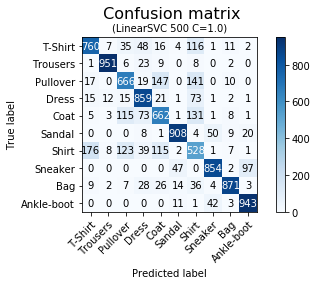

Test accuracy:  0.8002 

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.69      0.67      0.68      1000
           3       0.78      0.86      0.82      1000
           4       0.66      0.66      0.66      1000
           5       0.92      0.91      0.91      1000
           6       0.51      0.53      0.52      1000
           7       0.90      0.85      0.87      1000
           8       0.94      0.87      0.90      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



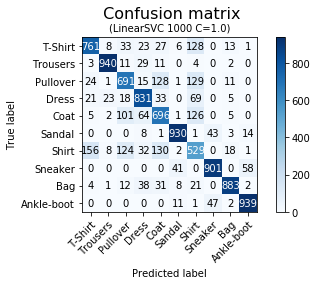

Test accuracy:  0.8101 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.96      0.94      0.95      1000
           2       0.70      0.69      0.69      1000
           3       0.80      0.83      0.81      1000
           4       0.66      0.70      0.68      1000
           5       0.93      0.93      0.93      1000
           6       0.52      0.53      0.53      1000
           7       0.91      0.90      0.91      1000
           8       0.94      0.88      0.91      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



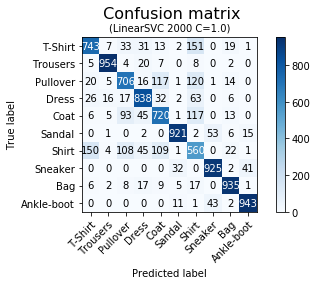

Test accuracy:  0.8245 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.71      0.72      1000
           3       0.83      0.84      0.83      1000
           4       0.71      0.72      0.72      1000
           5       0.94      0.92      0.93      1000
           6       0.54      0.56      0.55      1000
           7       0.91      0.93      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



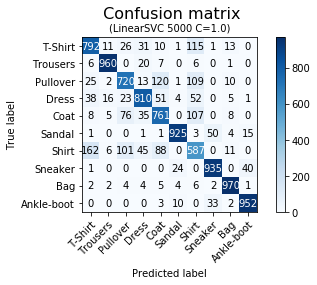

Test accuracy:  0.8412 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.76      0.72      0.74      1000
           3       0.84      0.81      0.83      1000
           4       0.73      0.76      0.74      1000
           5       0.95      0.93      0.94      1000
           6       0.60      0.59      0.59      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


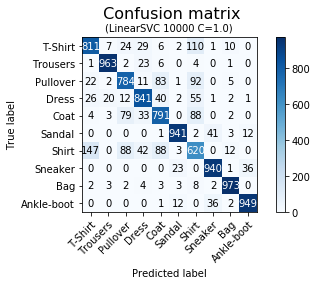

Test accuracy:  0.8613 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.79      0.78      0.79      1000
           3       0.86      0.84      0.85      1000
           4       0.78      0.79      0.78      1000
           5       0.95      0.94      0.95      1000
           6       0.63      0.62      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


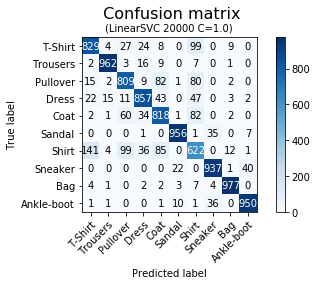

Test accuracy:  0.8717 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.81      0.81      1000
           3       0.88      0.86      0.87      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.66      0.62      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



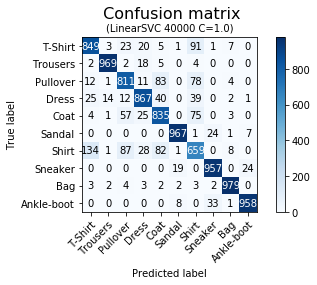

Test accuracy:  0.8851 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.89      0.87      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.69      0.66      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



NameError: name 'X_train_9_4_2' is not defined

In [4]:
############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit Defaultwerten  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


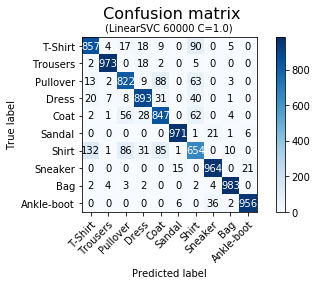

Test accuracy:  0.892 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [6]:
# Fortsetzung !!!!!!!!!!!!!!!!!!!!
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")


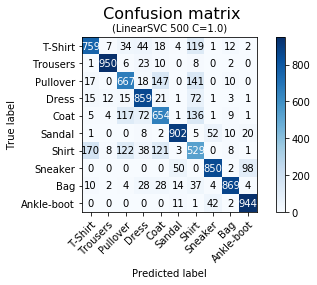

Test accuracy:  0.7983 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.69      0.67      0.68      1000
           3       0.79      0.86      0.82      1000
           4       0.65      0.65      0.65      1000
           5       0.91      0.90      0.91      1000
           6       0.50      0.53      0.52      1000
           7       0.89      0.85      0.87      1000
           8       0.94      0.87      0.90      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



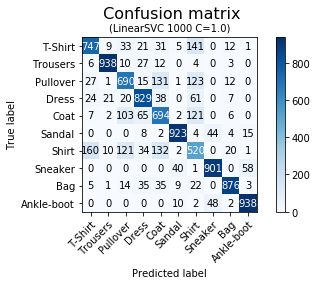

Test accuracy:  0.8056 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.96      0.94      0.95      1000
           2       0.70      0.69      0.69      1000
           3       0.80      0.83      0.82      1000
           4       0.65      0.69      0.67      1000
           5       0.93      0.92      0.93      1000
           6       0.52      0.52      0.52      1000
           7       0.91      0.90      0.90      1000
           8       0.93      0.88      0.90      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


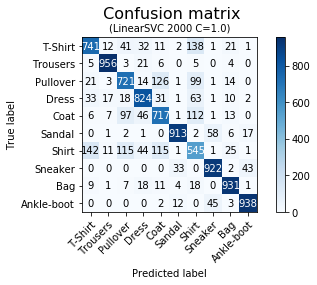

Test accuracy:  0.8208 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1000
           1       0.95      0.96      0.95      1000
           2       0.72      0.72      0.72      1000
           3       0.82      0.82      0.82      1000
           4       0.70      0.72      0.71      1000
           5       0.94      0.91      0.93      1000
           6       0.55      0.55      0.55      1000
           7       0.90      0.92      0.91      1000
           8       0.90      0.93      0.92      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


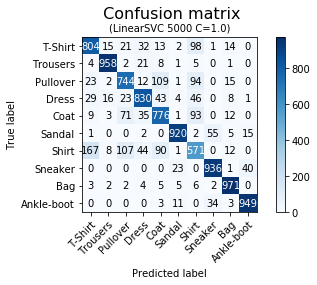

Test accuracy:  0.8459 

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1000
           1       0.95      0.96      0.96      1000
           2       0.77      0.74      0.76      1000
           3       0.85      0.83      0.84      1000
           4       0.74      0.78      0.76      1000
           5       0.95      0.92      0.93      1000
           6       0.62      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.97      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


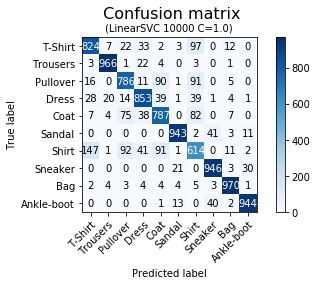

Test accuracy:  0.8633 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.85      0.85      0.85      1000
           4       0.77      0.79      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.66      0.61      0.64      1000
           7       0.92      0.95      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


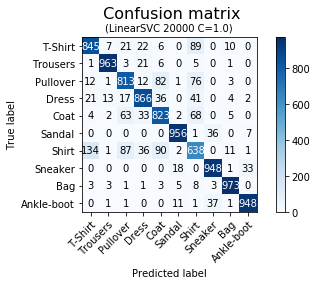

Test accuracy:  0.8773 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.97      0.96      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.87      0.87      0.87      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.69      0.64      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


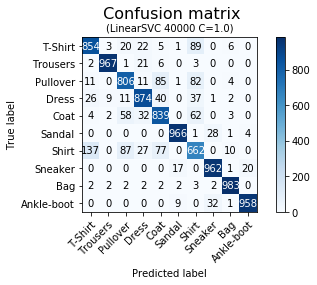

Test accuracy:  0.8871 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.88      0.87      0.88      1000
           4       0.80      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.66      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



NameError: name 'X_train_9_4_2_ls_hys' is not defined

In [7]:
############################################################################
##################  LinearSVC, loss=hinge ##################################
##################  Training mit Defaultwerten #############################
############################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_ls_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


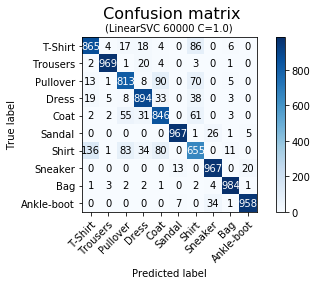

Test accuracy:  0.8918 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.66      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [8]:
# Fortsetzung !!!!!!!
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")

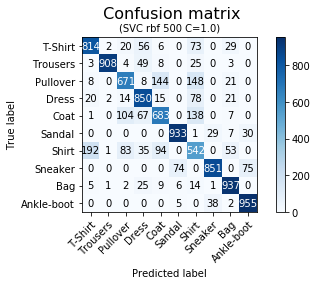

Test accuracy:  0.8144 

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.99      0.91      0.95      1000
           2       0.75      0.67      0.71      1000
           3       0.78      0.85      0.81      1000
           4       0.71      0.68      0.70      1000
           5       0.92      0.93      0.92      1000
           6       0.53      0.54      0.54      1000
           7       0.93      0.85      0.89      1000
           8       0.87      0.94      0.90      1000
           9       0.90      0.95      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



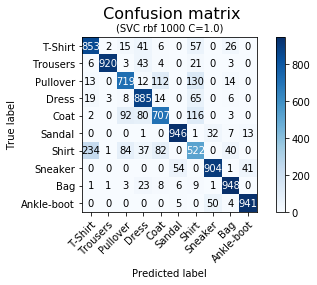

Test accuracy:  0.8345 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.99      0.92      0.95      1000
           2       0.78      0.72      0.75      1000
           3       0.79      0.89      0.83      1000
           4       0.76      0.71      0.73      1000
           5       0.94      0.95      0.94      1000
           6       0.57      0.52      0.54      1000
           7       0.92      0.90      0.91      1000
           8       0.90      0.95      0.92      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



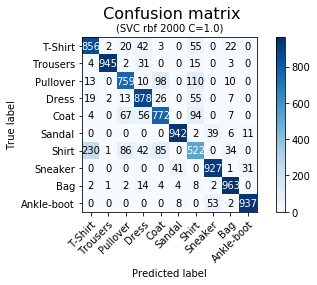

Test accuracy:  0.8501 

              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1000
           1       0.99      0.94      0.97      1000
           2       0.80      0.76      0.78      1000
           3       0.82      0.88      0.85      1000
           4       0.78      0.77      0.78      1000
           5       0.95      0.94      0.94      1000
           6       0.61      0.52      0.56      1000
           7       0.91      0.93      0.92      1000
           8       0.91      0.96      0.94      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



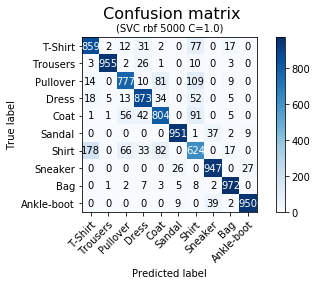

Test accuracy:  0.8712 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.84      0.78      0.81      1000
           3       0.85      0.87      0.86      1000
           4       0.80      0.80      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.64      0.62      0.63      1000
           7       0.92      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



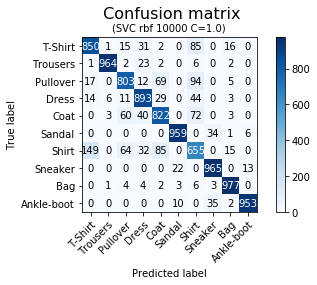

Test accuracy:  0.8841 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.86      0.89      0.88      1000
           4       0.81      0.82      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.68      0.66      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



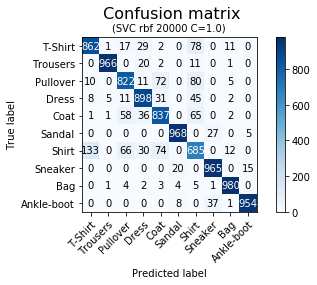

Test accuracy:  0.8937 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.69      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



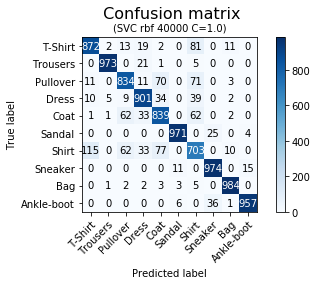

Test accuracy:  0.9008 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.70      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



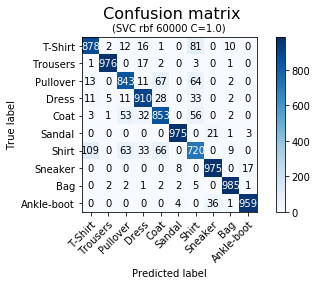

Test accuracy:  0.9074 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [9]:
############################################################################
##################  SVC RBF-Kernel, mit StandardScaler #####################
##################    decision_function_shape = 'ovo'  #####################
##################  Defaultwerte
############################################################################

train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

In [14]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  1. Durchlauf                      ##########################
##############################################################################
print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.836

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8125
Precision-Score: 0.624696 (0.066579) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.624696 (0.066579) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.521842 (0.059965) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.713856 (0.084625) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.742880 (0.101267) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.815929 (0.070169) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.858675 (0.057327) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.837012 (0.065507) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.833107 (0.069040) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.833107 (0.069040) mit Parameter: {


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.85

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8462
Precision-Score: 0.649386 (0.051573) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.561331 (0.070545) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.711229 (0.061117) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.771587 (0.028559) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.811479 (0.019238) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.832771 (0.020161) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.850738 (0.011929) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.838597 (0.023612) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.829386 (0.021358) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.815509 (0.021899) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.81657


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8734

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8712
Precision-Score: 0.645530 (0.037433) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.729202 (0.007810) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.755603 (0.010417) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.805740 (0.008442) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.836947 (0.005508) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.858538 (0.006030) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.872141 (0.004855) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.869360 (0.004497) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.860346 (0.004526) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.851310 (0.005068) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.835

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.87835

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8801
Precision-Score: 0.706024 (0.008618) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.740353 (0.002652) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.768894 (0.002157) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.822818 (0.001391) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.848293 (0.000922) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.866567 (0.003727) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.876445 (0.002711) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.877104 (0.003022) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.872465 (0.002791) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.863284 (0.003539) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8526

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.886625

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8883
Precision-Score: 0.727224 (0.003073) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.751747 (0.002236) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.798457 (0.000023) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.832764 (0.001479) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.859089 (0.002596) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.875215 (0.001755) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.882624 (0.001787) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885545 (0.001405) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.884424 (0.000192) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.878962 (0.000996) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.871

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8905833333333333

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8918
Precision-Score: 0.731737 (0.003078) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.757229 (0.002095) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.811653 (0.002841) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.840640 (0.002553) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.865505 (0.002219) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.879955 (0.001051) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.887330 (0.001674) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.886642 (0.000551) mit Parameter: {'svm__C': 4.0}
Precision-Sco

In [15]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  2. Durchlauf          ######################################
##############################################################################
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')



GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.836

 Besten Parameter:  {'svm__C': 0.04419417382415922}
Bester Estimator score:  0.8068
Precision-Score: 0.815929 (0.070169) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.822571 (0.067303) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.827071 (0.071168) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.833484 (0.071340) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.836151 (0.072783) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.843063 (0.062687) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.853651 (0.061673) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.847198 (0.071389) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.858675 (0.057327) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.848675 (0.063

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8525

 Besten Parameter:  {'svm__C': 0.07432544468767006}
Bester Estimator score:  0.8472
Precision-Score: 0.832771 (0.020161) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.836853 (0.016321) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.838199 (0.012208) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.841662 (0.011377) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.848720 (0.014522) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.848308 (0.010280) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.849936 (0.011454) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.852493 (0.011094) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.850738 (0.01

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8752

 Besten Parameter:  {'svm__C': 0.10511205190671431}
Bester Estimator score:  0.8721
Precision-Score: 0.858538 (0.006030) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.861763 (0.006133) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.862313 (0.005246) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.864147 (0.005586) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.865901 (0.006352) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.867812 (0.006629) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.870338 (0.005349) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.870985 (0.005673) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.872141 (0.0


 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.886925

 Besten Parameter:  {'svm__C': 0.21022410381342863}
Bester Estimator score:  0.8878
Precision-Score: 0.882624 (0.001787) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.882990 (0.001455) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.883828 (0.001080) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.884187 (0.001853) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.884614 (0.001658) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.885003 (0.001688) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.885452 (0.001446) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.885859 (0.001567) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.885545 (0.001405) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.885377 (0.000737) mit Parameter: {'svm__C': 0.297301778750

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(1.0),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


*********************************************************************
GridSearch LinearSVC 60000 2. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.25 0.3  0.35 0.42 0.5  0.59 0.71 0.84 1.   1.19 1.41 1.68 2.   2.38
 2.83 3.36 4.  ]

 Bester Score:  0.8913

 Besten Parameter:  {'svm__C': 0.5}
Bester Estimator score:  0.8905
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889673 (0.001192) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.890152 (0.000915) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.890127 (0.000918) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.890436 (0.000896) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.890249 (0.000521) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.890158 (0.000849) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.889976 (0.000922) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.889505 (0.001021) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.88

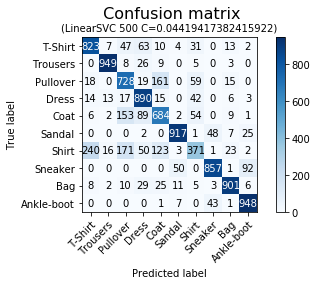

Test accuracy:  0.8068 

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1000
           1       0.96      0.95      0.95      1000
           2       0.64      0.73      0.68      1000
           3       0.76      0.89      0.82      1000
           4       0.67      0.68      0.67      1000
           5       0.92      0.92      0.92      1000
           6       0.65      0.37      0.47      1000
           7       0.90      0.86      0.88      1000
           8       0.92      0.90      0.91      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



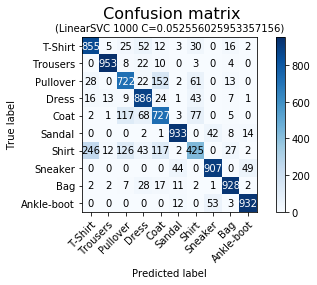

Test accuracy:  0.8268 

              precision    recall  f1-score   support

           0       0.74      0.85      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.72      0.72      1000
           3       0.79      0.89      0.83      1000
           4       0.69      0.73      0.71      1000
           5       0.92      0.93      0.93      1000
           6       0.66      0.42      0.52      1000
           7       0.90      0.91      0.91      1000
           8       0.92      0.93      0.92      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



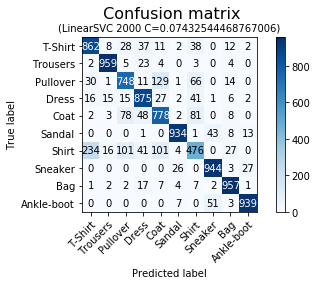

Test accuracy:  0.8472 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.74      0.78      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.67      0.48      0.56      1000
           7       0.91      0.94      0.93      1000
           8       0.92      0.96      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



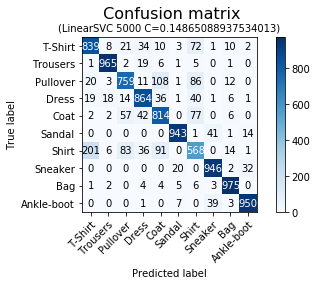

Test accuracy:  0.8623 

              precision    recall  f1-score   support

           0       0.77      0.84      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.81      0.76      0.78      1000
           3       0.85      0.86      0.86      1000
           4       0.76      0.81      0.79      1000
           5       0.96      0.94      0.95      1000
           6       0.66      0.57      0.61      1000
           7       0.92      0.95      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



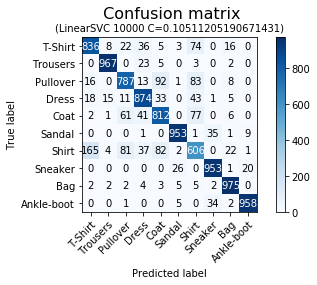

Test accuracy:  0.8721 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.82      0.79      0.80      1000
           3       0.85      0.87      0.86      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.61      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



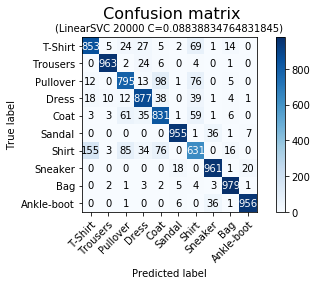

Test accuracy:  0.8801 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.96      0.97      1000
           2       0.81      0.80      0.80      1000
           3       0.87      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.71      0.63      0.67      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


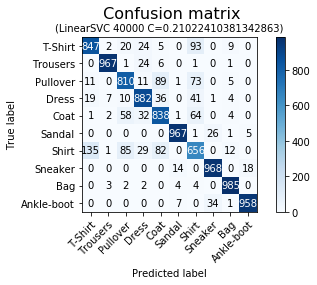

Test accuracy:  0.8878 

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.88      0.88      0.88      1000
           4       0.79      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.66      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


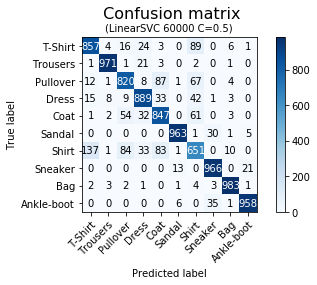

Test accuracy:  0.8905 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
####################################################################################
##################  LinearSVC, hinge     ###################################
##################  Training mit optimierten Hyperparametern #######################
####################################################################################
#################################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500', 0.04419417382415922 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.052556025953357156 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.07432544468767006 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.14865088937534013 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.10511205190671431 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.08838834764831845 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.21022410381342863 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.5 ,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")

In [10]:
##############################################################################
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.838

 Besten Parameter:  {'svm__C': 0.015625}
Bester Estimator score:  0.8141
Precision-Score: 0.613679 (0.065158) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.634527 (0.060681) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.722460 (0.051396) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.775903 (0.051472) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.824053 (0.058848) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.856671 (0.057405) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.860710 (0.055354) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.840631 (0.049857) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.834202 (0.073736) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.834440 (0.069054) mit Parameter:


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.85

 Besten Parameter:  {'svm__C': 0.015625}
Bester Estimator score:  0.8478
Precision-Score: 0.694106 (0.058634) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.740571 (0.032578) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.778836 (0.024581) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.816337 (0.018926) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.844190 (0.016331) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.849303 (0.020749) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.850136 (0.018623) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.835926 (0.024055) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.827088 (0.023695) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.818045 (0.026076) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.817

Accuracy-Score: 0.825400 (0.019845) mit Parameter: {'svm__C': 4.0}
Accuracy-Score: 0.820800 (0.019783) mit Parameter: {'svm__C': 16.0}
Accuracy-Score: 0.820200 (0.019954) mit Parameter: {'svm__C': 64.0}
Accuracy-Score: 0.818600 (0.020145) mit Parameter: {'svm__C': 256.0}
Accuracy-Score: 0.819800 (0.018862) mit Parameter: {'svm__C': 1024.0}
Roc-Score: 0.815222 (0.002320) mit Parameter: {'svm__C': 1.52587890625e-05}
Roc-Score: 0.845778 (0.005928) mit Parameter: {'svm__C': 6.103515625e-05}
Roc-Score: 0.882889 (0.004422) mit Parameter: {'svm__C': 0.000244140625}
Roc-Score: 0.903444 (0.005133) mit Parameter: {'svm__C': 0.0009765625}
Roc-Score: 0.915444 (0.003742) mit Parameter: {'svm__C': 0.00390625}
Roc-Score: 0.921556 (0.003450) mit Parameter: {'svm__C': 0.015625}
Roc-Score: 0.921556 (0.005109) mit Parameter: {'svm__C': 0.0625}
Roc-Score: 0.918222 (0.008054) mit Parameter: {'svm__C': 0.25}
Roc-Score: 0.909667 (0.009193) mit Parameter: {'svm__C': 1.0}
Roc-Score: 0.903000 (0.011025) mit Par


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.887175

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8909
Precision-Score: 0.767731 (0.001934) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.807145 (0.000517) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.838241 (0.000747) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.861306 (0.002156) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.876288 (0.002440) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.882938 (0.001844) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.886373 (0.000935) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885483 (0.000571) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.882171 (0.001593) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.876656 (0.001010) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8

Roc-Score: 0.939769 (0.000218) mit Parameter: {'svm__C': 0.25}
Roc-Score: 0.938611 (0.000023) mit Parameter: {'svm__C': 1.0}
Roc-Score: 0.936454 (0.000567) mit Parameter: {'svm__C': 4.0}
Roc-Score: 0.932769 (0.000322) mit Parameter: {'svm__C': 16.0}
Roc-Score: 0.922981 (0.001575) mit Parameter: {'svm__C': 64.0}
Roc-Score: 0.924481 (0.003562) mit Parameter: {'svm__C': 256.0}
Roc-Score: 0.924009 (0.000805) mit Parameter: {'svm__C': 1024.0}


In [11]:
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  2. Durchlauf     ###########################################
##############################################################################

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.03 0.04
 0.04 0.05 0.06]

 Bester Score:  0.842

 Besten Parameter:  {'svm__C': 0.03716272234383503}
Bester Estimator score:  0.8162
Precision-Score: 0.824053 (0.058848) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.836365 (0.061989) mit Parameter: {'svm__C': 0.004645340292979379}
Precision-Score: 0.848722 (0.055110) mit Parameter: {'svm__C': 0.005524271728019903}
Precision-Score: 0.856829 (0.053873) mit Parameter: {'svm__C': 0.0065695032441696445}
Precision-Score: 0.855329 (0.061800) mit Parameter: {'svm__C': 0.0078125}
Precision-Score: 0.852448 (0.061212) mit Parameter: {'svm__C': 0.009290680585958758}
Precision-Score: 0.851671 (0.061789) mit Parameter: {'svm__C': 0.011048543456039806}
Precision-Score: 0.854647 (0.058083) mit Parameter: {'svm__C': 0.013139006488339289}
Precision-Score: 0.856671 (0.057405) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.859

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range: [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.03 0.04
 0.04 0.05 0.06]

 Bester Score:  0.8505

 Besten Parameter:  {'svm__C': 0.018581361171917516}
Bester Estimator score:  0.8499
Precision-Score: 0.844190 (0.016331) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.843730 (0.016476) mit Parameter: {'svm__C': 0.004645340292979379}
Precision-Score: 0.844329 (0.015756) mit Parameter: {'svm__C': 0.005524271728019903}
Precision-Score: 0.845204 (0.015084) mit Parameter: {'svm__C': 0.0065695032441696445}
Precision-Score: 0.845845 (0.014665) mit Parameter: {'svm__C': 0.0078125}
Precision-Score: 0.849008 (0.017532) mit Parameter: {'svm__C': 0.009290680585958758}
Precision-Score: 0.847039 (0.016251) mit Parameter: {'svm__C': 0.011048543456039806}
Precision-Score: 0.846293 (0.018003) mit Parameter: {'svm__C': 0.013139006488339289}
Precision-Score: 0.849

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8745

 Besten Parameter:  {'svm__C': 0.026278012976678578}
Bester Estimator score:  0.8712
Precision-Score: 0.871696 (0.006372) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.871937 (0.006100) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.872317 (0.005891) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.873518 (0.005625) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.872670 (0.005809) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.873047 (0.005722) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.873063 (0.006188) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.873000 (0.006319) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.872776 (0.


 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.888125

 Besten Parameter:  {'svm__C': 0.10511205190671431}
Bester Estimator score:  0.8904
Precision-Score: 0.882938 (0.001844) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.883809 (0.001789) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.884810 (0.001510) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.885254 (0.001313) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.885328 (0.001336) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.885734 (0.001421) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.885884 (0.001255) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.886304 (0.001106) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.886373 (0.000935) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.886928 (0.000861) mit Parameter: {'svm__C': 0.07

F1-Score: 0.889074 (0.000100) mit Parameter: {'svm__C': 1.0}
Accuracy-Score: 0.891567 (0.000742) mit Parameter: {'svm__C': 0.0625}
Accuracy-Score: 0.891950 (0.000787) mit Parameter: {'svm__C': 0.07432544468767006}
Accuracy-Score: 0.892467 (0.000829) mit Parameter: {'svm__C': 0.08838834764831845}
Accuracy-Score: 0.892517 (0.000841) mit Parameter: {'svm__C': 0.10511205190671431}
Accuracy-Score: 0.892267 (0.000826) mit Parameter: {'svm__C': 0.125}
Accuracy-Score: 0.892200 (0.000813) mit Parameter: {'svm__C': 0.14865088937534013}
Accuracy-Score: 0.891850 (0.000540) mit Parameter: {'svm__C': 0.1767766952966369}
Accuracy-Score: 0.891817 (0.000352) mit Parameter: {'svm__C': 0.21022410381342863}
Accuracy-Score: 0.891583 (0.000392) mit Parameter: {'svm__C': 0.25}
Accuracy-Score: 0.891500 (0.000319) mit Parameter: {'svm__C': 0.29730177875068026}
Accuracy-Score: 0.891083 (0.000437) mit Parameter: {'svm__C': 0.3535533905932738}
Accuracy-Score: 0.890967 (0.000272) mit Parameter: {'svm__C': 0.420448

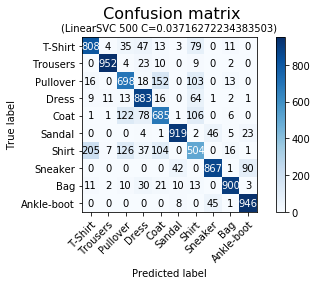

Test accuracy:  0.8162 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.69      0.70      0.70      1000
           3       0.79      0.88      0.83      1000
           4       0.68      0.69      0.68      1000
           5       0.93      0.92      0.93      1000
           6       0.57      0.50      0.54      1000
           7       0.90      0.87      0.89      1000
           8       0.94      0.90      0.92      1000
           9       0.89      0.95      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.81      0.82      0.81     10000



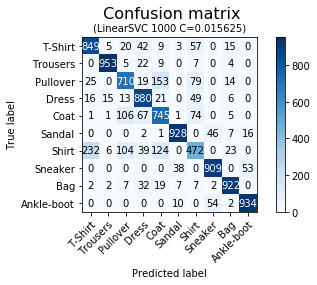

Test accuracy:  0.8302 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.74      0.71      0.72      1000
           3       0.80      0.88      0.84      1000
           4       0.69      0.74      0.72      1000
           5       0.94      0.93      0.93      1000
           6       0.63      0.47      0.54      1000
           7       0.90      0.91      0.90      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



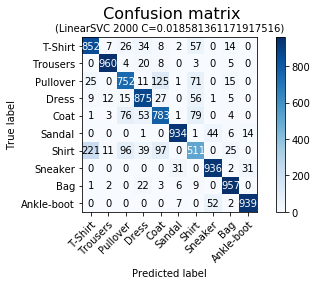

Test accuracy:  0.8499 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.78      0.75      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.75      0.78      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.65      0.51      0.57      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.96      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



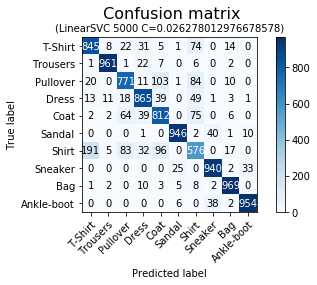

Test accuracy:  0.8639 

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.86      0.86      0.86      1000
           4       0.76      0.81      0.79      1000
           5       0.96      0.95      0.95      1000
           6       0.66      0.58      0.61      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



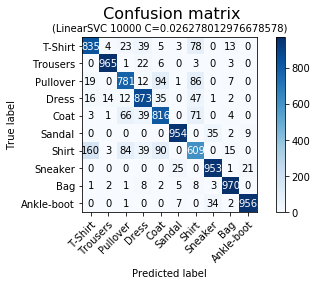

Test accuracy:  0.8712 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.81      0.78      0.79      1000
           3       0.85      0.87      0.86      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.61      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



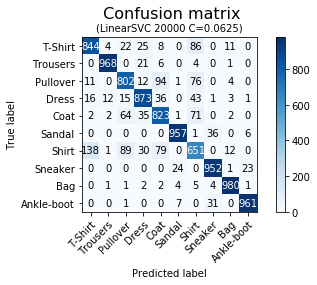

Test accuracy:  0.8811 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.80      0.80      1000
           3       0.87      0.87      0.87      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.69      0.65      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



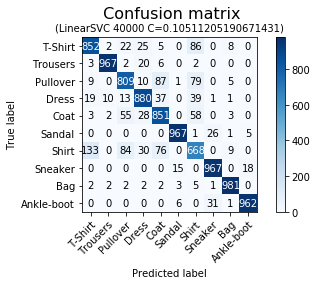

Test accuracy:  0.8904 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.88      0.88      0.88      1000
           4       0.80      0.85      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.67      0.69      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



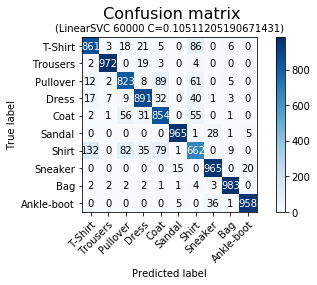

Test accuracy:  0.8934 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [13]:
####################################################################################
##################  LinearSVC, squared_hinge     ###################################
##################  Training mit optimierten Hyperparametern #######################
####################################################################################
#################################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500', 0.03716272234383503,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.015625,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.018581361171917516,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.026278012976678578,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.026278012976678578,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.0625,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")

In [ ]:
##############################################################################
##############################################################################
################  GridSearchCV RBF-Kernel           ##########################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch RBF 500 1. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1000 1. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1. Durchlauf")
clf_5000_RBF, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')



GridSearch LinearSVC 500 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.836

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.780061 (0.051484) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.791490 (0.056106) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.805161 (0.047650) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.779944 (0.047865) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.667300 (0.181737) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.240601 (0.148911) mit Parameter: {'svm


 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.847

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.762664 (0.012907) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.763188 (0.019204) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.793619 (0.029882) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.783214 (0.030437) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.691934 (0.078870) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.266924 (0.091092) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma'


 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.852

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.749617 (0.032352) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.752908 (0.031799) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.772174 (0.029581) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.766182 (0.018340) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.805878 (0.061076) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.318581 (0.118316) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma'


 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.8742

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 0.0009765625}
Precision-Score: 0.754004 (0.009654) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.758432 (0.009770) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.770606 (0.012677) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.755596 (0.016800) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.821187 (0.020973) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.320976 (0.153515) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma':

*********************************************************************
GridSearch LinearSVC 10000 1. Durchlauf


In [33]:
##############################################################################
##############################################################################
################  GridSearchCV RBF-Kernel           ##########################
################  2. Durchlauf                      ##########################
##############################################################################

print("GridSearch RBF 500 2. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1000 2. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(6.103515625e-05), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 2000 2. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(16.0),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

#print("*********************************************************************")
#print("GridSearch RBF 5000 2. Durchlauf")
#clf_5000_RBF, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
 #                                       'rbf',10, 2, 0, get_finer_range(16.0),
  #                                       get_finer_range(0.0009765625), 1)
#save_trained_model_as_pkl(clf_5000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
#save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch RBF 500 2. Durchlauf

 C_range:  [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 gamma_range: [6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04 2.90e-04 3.45e-04 4.11e-04 4.88e-04 5.81e-04 6.91e-04 8.21e-04
 9.77e-04]

 Beste Score:  0.852

 Besten Parameter:  {'svm__C': 2.8284271247461903, 'svm__gamma': 0.00017263349150062197}
Precision-Score: 0.800798 (0.044171) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.812107 (0.043764) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 7.25834420778028e-05}
Precision-Score: 0.818440 (0.044071) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 8.631674575031098e-05}
Precision-Score: 0.825127 (0.043315) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001026484881901507}
Precision-Score: 0.829552 (0.042827) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001220703125}
Precision-Score: 0.835075 (0.039172) mit Parameter: {'s

Roc-Score: 0.906667 (0.028631) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0001026484881901507}
Roc-Score: 0.908889 (0.026667) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0001220703125}
Roc-Score: 0.910000 (0.027420) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0001451668841556056}
Roc-Score: 0.911111 (0.023831) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.00017263349150062197}
Roc-Score: 0.915556 (0.022879) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0002052969763803014}
Roc-Score: 0.915556 (0.023413) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.000244140625}
Roc-Score: 0.913333 (0.023727) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0002903337683112112}
Roc-Score: 0.912222 (0.023544) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.00034526698300124393}
Roc-Score: 0.908889 (0.026200) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.000410593952760


 C_range:  [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 gamma_range: [1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04]

 Beste Score:  0.854

 Besten Parameter:  {'svm__C': 2.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.768847 (0.013356) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.775140 (0.016735) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 1.81458605194507e-05}
Precision-Score: 0.782608 (0.016890) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 2.1579186437577746e-05}
Precision-Score: 0.786038 (0.020672) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 2.5662122047537674e-05}
Precision-Score: 0.789852 (0.023018) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 3.0517578125e-05}
Precision-Score: 0.791042 (0.024785) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 3.62917210389014e-05}
P

Recall-Score: 0.851000 (0.035341) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0002052969763803014}
Recall-Score: 0.847000 (0.034073) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.000244140625}
Recall-Score: 0.791000 (0.035623) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 1.52587890625e-05}
Recall-Score: 0.805000 (0.026552) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 1.81458605194507e-05}
Recall-Score: 0.815000 (0.029411) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 2.1579186437577746e-05}
Recall-Score: 0.814000 (0.032924) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 2.5662122047537674e-05}
Recall-Score: 0.821000 (0.031448) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 3.0517578125e-05}
Recall-Score: 0.822000 (0.030919) mit Parameter: {'svm__C': 2.8284271247461903, 'svm__gamma': 3.62917210389014e-05}
Recall-Score: 0.831000 (0.033302) mit Parameter: {'svm__C': 2.8284271247461903, 's

F1-Score: 0.833008 (0.036973) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 2.1579186437577746e-05}
F1-Score: 0.836948 (0.036134) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 2.5662122047537674e-05}
F1-Score: 0.841097 (0.037786) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 3.0517578125e-05}
F1-Score: 0.841221 (0.033630) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 3.62917210389014e-05}
F1-Score: 0.848640 (0.030092) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 4.315837287515549e-05}
F1-Score: 0.847377 (0.032169) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 5.132424409507535e-05}
F1-Score: 0.848133 (0.039185) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 6.103515625e-05}
F1-Score: 0.841166 (0.036060) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 7.25834420778028e-05}
F1-Score: 0.836415 (0.037658) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 8.631674575031098e-05}
F1-

Accuracy-Score: 0.838000 (0.033407) mit Parameter: {'svm__C': 8.0, 'svm__gamma': 0.0001220703125}
Accuracy-Score: 0.840000 (0.031305) mit Parameter: {'svm__C': 8.0, 'svm__gamma': 0.0001451668841556056}
Accuracy-Score: 0.837000 (0.035511) mit Parameter: {'svm__C': 8.0, 'svm__gamma': 0.00017263349150062197}
Accuracy-Score: 0.836000 (0.038523) mit Parameter: {'svm__C': 8.0, 'svm__gamma': 0.0002052969763803014}
Accuracy-Score: 0.834000 (0.041761) mit Parameter: {'svm__C': 8.0, 'svm__gamma': 0.000244140625}
Accuracy-Score: 0.838000 (0.036277) mit Parameter: {'svm__C': 9.513656920021768, 'svm__gamma': 1.52587890625e-05}
Accuracy-Score: 0.842000 (0.037630) mit Parameter: {'svm__C': 9.513656920021768, 'svm__gamma': 1.81458605194507e-05}
Accuracy-Score: 0.845000 (0.036946) mit Parameter: {'svm__C': 9.513656920021768, 'svm__gamma': 2.1579186437577746e-05}
Accuracy-Score: 0.845000 (0.032634) mit Parameter: {'svm__C': 9.513656920021768, 'svm__gamma': 2.5662122047537674e-05}
Accuracy-Score: 0.85200

Roc-Score: 0.916667 (0.016667) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 2.1579186437577746e-05}
Roc-Score: 0.915000 (0.017925) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 2.5662122047537674e-05}
Roc-Score: 0.912778 (0.018601) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 3.0517578125e-05}
Roc-Score: 0.911667 (0.018333) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 3.62917210389014e-05}
Roc-Score: 0.907222 (0.019253) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 4.315837287515549e-05}
Roc-Score: 0.908333 (0.020069) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 5.132424409507535e-05}
Roc-Score: 0.910000 (0.018053) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 6.103515625e-05}
Roc-Score: 0.910556 (0.015605) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 7.25834420778028e-05}
Roc-Score: 0.909444 (0.019253) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 8.631674575031098e-05}
Roc-Score: 0.907778 (0.021257) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 0.0001026484881901507}
Roc-Score: 

F1-Score: 0.852037 (0.026272) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 0.0006905339660024879}
F1-Score: 0.851794 (0.026483) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 0.0008211879055212056}
F1-Score: 0.848764 (0.025601) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 0.0009765625}
F1-Score: 0.843022 (0.025648) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 6.103515625e-05}
F1-Score: 0.843284 (0.026149) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 7.25834420778028e-05}
F1-Score: 0.843302 (0.027644) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 8.631674575031098e-05}
F1-Score: 0.842229 (0.025926) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 0.0001026484881901507}
F1-Score: 0.842300 (0.025498) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 0.0001220703125}
F1-Score: 0.843628 (0.024822) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 0.0001451668841556056}
F1-Score: 0

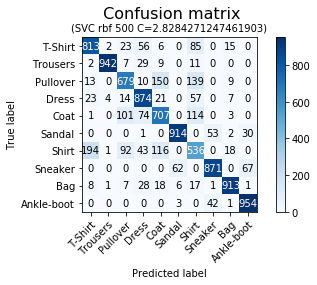

Test accuracy:  0.8203 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.99      0.94      0.97      1000
           2       0.74      0.68      0.71      1000
           3       0.78      0.87      0.83      1000
           4       0.69      0.71      0.70      1000
           5       0.93      0.91      0.92      1000
           6       0.56      0.54      0.55      1000
           7       0.90      0.87      0.89      1000
           8       0.94      0.91      0.93      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



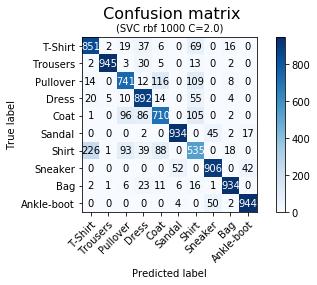

Test accuracy:  0.8392 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.99      0.94      0.97      1000
           2       0.77      0.74      0.75      1000
           3       0.80      0.89      0.84      1000
           4       0.75      0.71      0.73      1000
           5       0.94      0.93      0.94      1000
           6       0.59      0.54      0.56      1000
           7       0.90      0.91      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



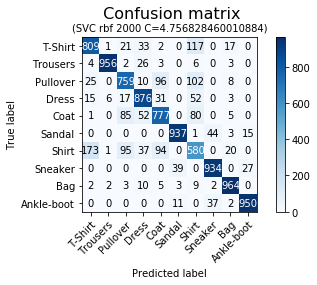

Test accuracy:  0.8542 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.76      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.77      0.78      0.77      1000
           5       0.95      0.94      0.94      1000
           6       0.61      0.58      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [34]:
train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',2.8284271247461903, 0.00017263349150062197,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000', 2.0, 0.000244140625,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000', 4.756828460010884, 0.00048828125,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen/", "seed_1_random_A_with_scaler","HOG_942_ovo.pkl")

In [37]:
#########################################################################
#########################################################################
#########################################################################
##########   2. Aufteilung der Trainingsdaten 
##########   gemäss   make_training_subset_B
#########################################################################

X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_B(X_train_9_4_2_l2_hys, y_train)

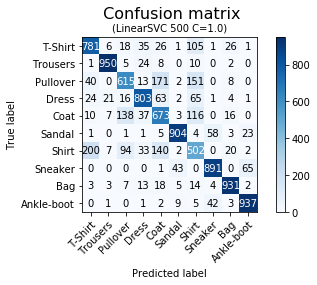

Test accuracy:  0.7987 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.95      0.95      0.95      1000
           2       0.69      0.61      0.65      1000
           3       0.84      0.80      0.82      1000
           4       0.61      0.67      0.64      1000
           5       0.93      0.90      0.92      1000
           6       0.52      0.50      0.51      1000
           7       0.89      0.89      0.89      1000
           8       0.92      0.93      0.92      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



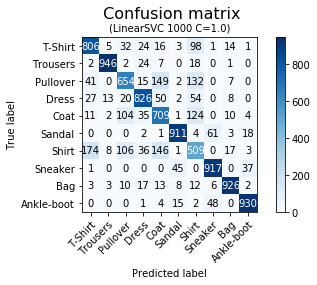

Test accuracy:  0.8134 

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.97      0.95      0.96      1000
           2       0.70      0.65      0.68      1000
           3       0.84      0.83      0.83      1000
           4       0.65      0.71      0.68      1000
           5       0.92      0.91      0.92      1000
           6       0.53      0.51      0.52      1000
           7       0.89      0.92      0.90      1000
           8       0.94      0.93      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


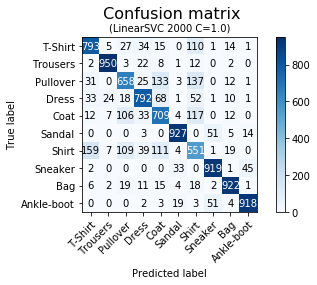

Test accuracy:  0.8139 

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1000
           1       0.95      0.95      0.95      1000
           2       0.70      0.66      0.68      1000
           3       0.82      0.79      0.81      1000
           4       0.67      0.71      0.69      1000
           5       0.93      0.93      0.93      1000
           6       0.55      0.55      0.55      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.92      0.92      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


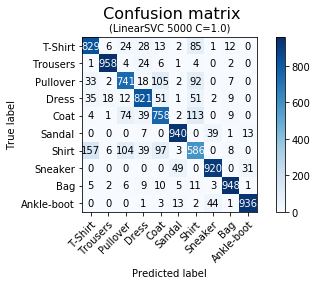

Test accuracy:  0.8437 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.74      0.75      1000
           3       0.83      0.82      0.83      1000
           4       0.73      0.76      0.74      1000
           5       0.92      0.94      0.93      1000
           6       0.62      0.59      0.60      1000
           7       0.91      0.92      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


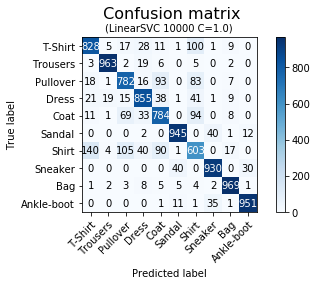

Test accuracy:  0.861 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.79      0.78      0.78      1000
           3       0.85      0.85      0.85      1000
           4       0.76      0.78      0.77      1000
           5       0.94      0.94      0.94      1000
           6       0.65      0.60      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


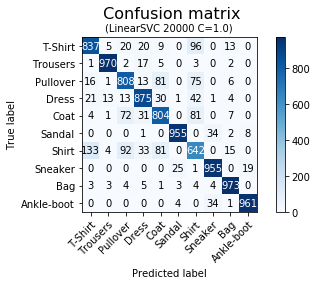

Test accuracy:  0.878 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.81      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.80      0.80      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.68      0.64      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


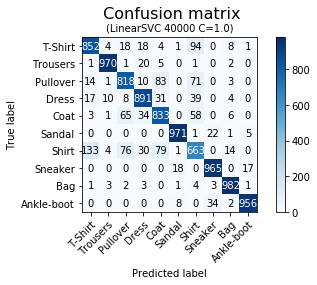

Test accuracy:  0.8901 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.97      1000
           2       0.83      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.83      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.66      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



NameError: name 'X_train_9_4_2_ls_hys' is not defined

In [11]:
############################################################################
##################  LinearSVC, loss=hinge ##################################
##################  Training mit Defaultwerten #############################
############################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_ls_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


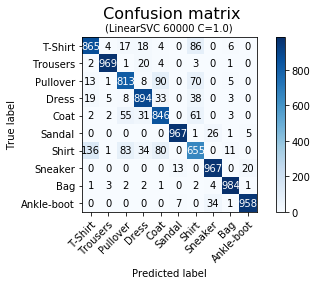

Test accuracy:  0.8918 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.66      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [18]:
# Fortsetzung
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")

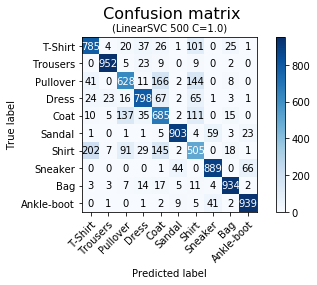

Test accuracy:  0.8018 

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.96      0.95      0.95      1000
           2       0.69      0.63      0.66      1000
           3       0.84      0.80      0.82      1000
           4       0.61      0.69      0.65      1000
           5       0.93      0.90      0.92      1000
           6       0.53      0.51      0.52      1000
           7       0.89      0.89      0.89      1000
           8       0.92      0.93      0.93      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



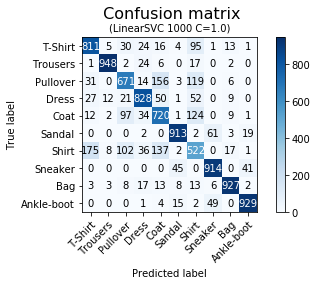

Test accuracy:  0.8183 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.67      0.69      1000
           3       0.84      0.83      0.84      1000
           4       0.65      0.72      0.69      1000
           5       0.92      0.91      0.92      1000
           6       0.55      0.52      0.54      1000
           7       0.89      0.91      0.90      1000
           8       0.94      0.93      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



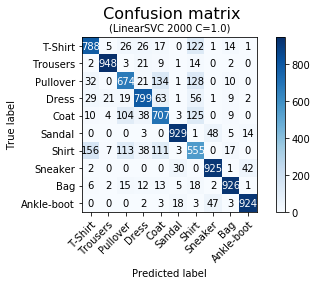

Test accuracy:  0.8175 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.96      0.95      0.95      1000
           2       0.71      0.67      0.69      1000
           3       0.83      0.80      0.82      1000
           4       0.67      0.71      0.69      1000
           5       0.94      0.93      0.93      1000
           6       0.54      0.56      0.55      1000
           7       0.90      0.93      0.91      1000
           8       0.93      0.93      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



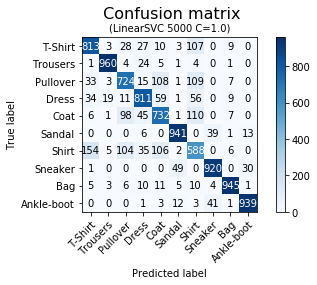

Test accuracy:  0.8373 

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.97      0.96      0.96      1000
           2       0.74      0.72      0.73      1000
           3       0.83      0.81      0.82      1000
           4       0.71      0.73      0.72      1000
           5       0.93      0.94      0.93      1000
           6       0.60      0.59      0.59      1000
           7       0.92      0.92      0.92      1000
           8       0.96      0.94      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


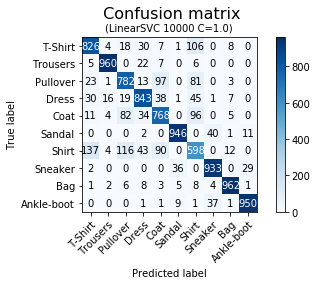

Test accuracy:  0.8568 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.76      0.78      0.77      1000
           3       0.85      0.84      0.84      1000
           4       0.76      0.77      0.76      1000
           5       0.95      0.95      0.95      1000
           6       0.64      0.60      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



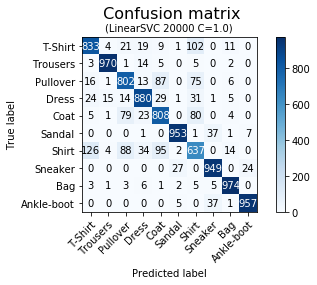

Test accuracy:  0.8763 

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.88      0.88      1000
           4       0.78      0.81      0.79      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.64      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


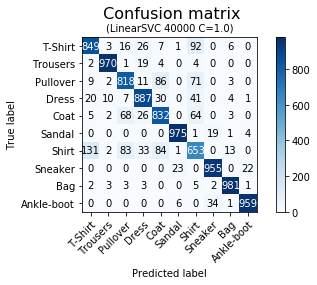

Test accuracy:  0.8879 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.97      1000
           2       0.82      0.82      0.82      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.83      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.65      0.68      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


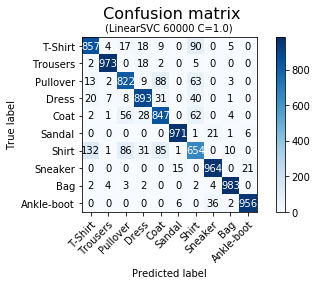

Test accuracy:  0.892 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [10]:

############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit Defaultwerten  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")


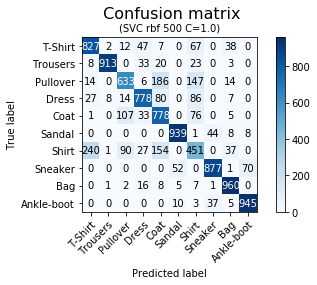

Test accuracy:  0.8101 

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1000
           1       0.99      0.91      0.95      1000
           2       0.74      0.63      0.68      1000
           3       0.83      0.78      0.80      1000
           4       0.63      0.78      0.70      1000
           5       0.93      0.94      0.94      1000
           6       0.52      0.45      0.48      1000
           7       0.91      0.88      0.90      1000
           8       0.89      0.96      0.92      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



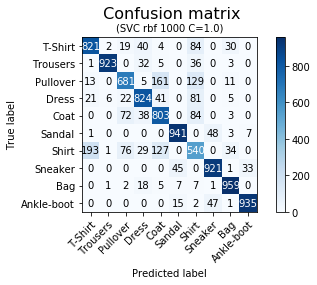

Test accuracy:  0.8348 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.92      0.95      1000
           2       0.78      0.68      0.73      1000
           3       0.84      0.82      0.83      1000
           4       0.70      0.80      0.75      1000
           5       0.93      0.94      0.94      1000
           6       0.56      0.54      0.55      1000
           7       0.91      0.92      0.91      1000
           8       0.91      0.96      0.94      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



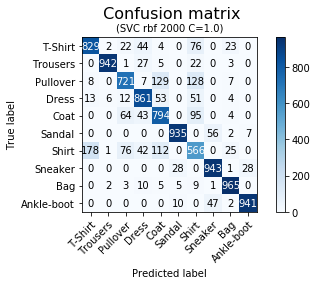

Test accuracy:  0.8497 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.94      0.96      1000
           2       0.80      0.72      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.72      0.79      0.76      1000
           5       0.96      0.94      0.95      1000
           6       0.60      0.57      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.93      0.96      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



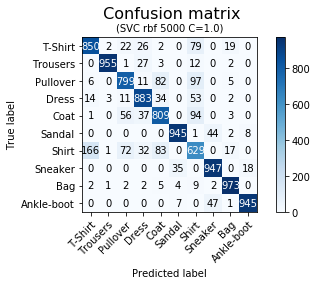

Test accuracy:  0.8735 

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.83      0.80      0.81      1000
           3       0.87      0.88      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.95      0.94      0.95      1000
           6       0.65      0.63      0.64      1000
           7       0.91      0.95      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



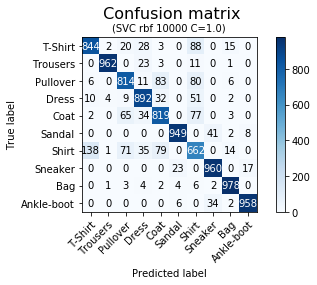

Test accuracy:  0.8838 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.68      0.66      0.67      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



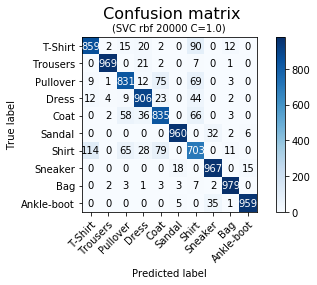

Test accuracy:  0.8968 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.88      0.91      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



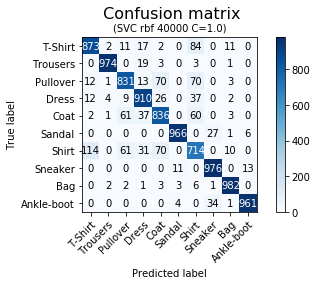

Test accuracy:  0.9023 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.84      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.71      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



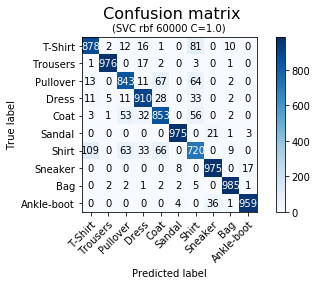

Test accuracy:  0.9074 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [16]:
############################################################################
##################  SVC RBF-Kernel, mit StandardScaler #####################
##################    decision_function_shape = 'ovo'  #####################
##################  Defaultwerte
############################################################################

train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")

In [41]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  1. Durchlauf                      ##########################
##############################################################################
print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

'''
print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')
'''

GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.818

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8093
Precision-Score: 0.594546 (0.055764) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.594546 (0.055764) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.507935 (0.030452) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.621614 (0.066462) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.717440 (0.055667) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.791060 (0.059678) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.833702 (0.056350) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.810226 (0.058248) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.805901 (0.056198) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.805901 (0.056198) mit Parameter: {


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.842

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8462
Precision-Score: 0.659144 (0.039770) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.581026 (0.054920) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.708304 (0.055019) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.757213 (0.024726) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.806089 (0.019978) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.838621 (0.023812) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.844074 (0.019655) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.844517 (0.022376) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.824831 (0.024532) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.822520 (0.025412) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8235


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8741

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8727
Precision-Score: 0.612140 (0.050885) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.725089 (0.008924) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.745005 (0.008293) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.801280 (0.003806) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.835349 (0.005325) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.859212 (0.003303) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.873104 (0.002403) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.870160 (0.002293) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.864337 (0.003814) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.854206 (0.004430) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.840

'\nprint("*********************************************************************")\nprint("GridSearch LinearSVC 20000 1. Durchlauf")\nclf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, \n                                        \'LinearSVC\',3, 0, 0, np.logspace(-16,10,14, base=2),\n                                         np.logspace(-16,4,11, base=2), 1)\nsave_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")\nsave_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/", \'Suchzeiten_GridSearch_1_DL.csv\')\n\nprint("*********************************************************************")\nprint("GridSearch LinearSVC 40000 1. Durchlauf")\nclf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, \n                            

In [45]:
# Fortsetzung 1. Durchlauf
print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

*********************************************************************
GridSearch LinearSVC 20000 1. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.87775

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8813
Precision-Score: 0.697879 (0.008366) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.735158 (0.003196) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.762351 (0.001506) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.819548 (0.001249) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.845648 (0.001749) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.865669 (0.000880) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.876218 (0.002085) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.876753 (0.001813) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.874077 (0.000486) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.864558 (0.000696) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8519

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.886475

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8884
Precision-Score: 0.723626 (0.007147) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.748751 (0.003747) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.795491 (0.000231) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.832490 (0.001250) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.857727 (0.002393) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.874586 (0.003980) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.882821 (0.003745) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885547 (0.003488) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.883492 (0.004205) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.879226 (0.004497) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.872

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8905833333333333

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8918
Precision-Score: 0.731737 (0.003078) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.757229 (0.002095) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.811653 (0.002841) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.840640 (0.002553) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.865505 (0.002219) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.879955 (0.001051) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.887330 (0.001674) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.886642 (0.000551) mit Parameter: {'svm__C': 4.0}
Precision-Sco

In [44]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  2. Durchlauf                      ##########################
##############################################################################
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.818

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8093
Precision-Score: 0.791060 (0.059678) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.800448 (0.061314) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.807341 (0.063403) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.808952 (0.063157) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.814230 (0.055800) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.815694 (0.054426) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.821964 (0.051841) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.822202 (0.051992) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.833702 (0.056350) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.832429 (0.046332) mit Para


 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.851

 Besten Parameter:  {'svm__C': 0.14865088937534013}
Bester Estimator score:  0.8444
Precision-Score: 0.838621 (0.023812) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.841891 (0.022112) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.841828 (0.017869) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.842550 (0.016998) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.844245 (0.017447) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.845685 (0.021743) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.843914 (0.021002) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.843376 (0.023061) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.844074 (0.019655) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.845853 (0.022057) mit Parameter: {'svm__C': 0.07432


 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8749

 Besten Parameter:  {'svm__C': 0.07432544468767006}
Bester Estimator score:  0.8726
Precision-Score: 0.859212 (0.003303) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.862220 (0.003308) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.864542 (0.002565) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.866084 (0.003248) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.867825 (0.003458) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.869819 (0.003692) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.871094 (0.002538) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.872433 (0.002676) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.873104 (0.002403) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.873986 (0.002534) mit Parameter: {'svm__C': 0.0743

In [46]:
# Fortsetzung 2. Durchlauf
print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(1.0),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

*********************************************************************
GridSearch LinearSVC 20000 2. Durchlauf

 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.87855

 Besten Parameter:  {'svm__C': 0.10511205190671431}
Bester Estimator score:  0.8811
Precision-Score: 0.876218 (0.002085) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.875978 (0.001138) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.876933 (0.001387) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.877582 (0.001041) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.877338 (0.001315) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.876984 (0.000657) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.877199 (0.001215) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.876953 (0.000858) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.876753 (0.001813) 

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.8867

 Besten Parameter:  {'svm__C': 0.29730177875068026}
Bester Estimator score:  0.8889
Precision-Score: 0.882821 (0.003745) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.883288 (0.003294) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.884088 (0.003458) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.884821 (0.003561) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.884927 (0.003347) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.885076 (0.003331) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.885380 (0.003477) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.885480 (0.003726) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.885547 (0.003488) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.885746 (0.003440) mit Parameter: {'svm__C': 0.29730177875068

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.25 0.3  0.35 0.42 0.5  0.59 0.71 0.84 1.   1.19 1.41 1.68 2.   2.38
 2.83 3.36 4.  ]

 Bester Score:  0.8913

 Besten Parameter:  {'svm__C': 0.5}
Bester Estimator score:  0.8905
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889673 (0.001192) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.890152 (0.000915) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.890127 (0.000918) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.890436 (0.000896) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.890249 (0.000521) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.890158 (0.000849) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.889976 (0.000922) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.889505 (0.001021) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.88

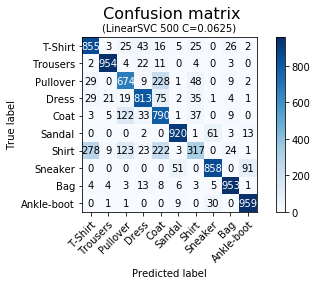

Test accuracy:  0.8093 

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1000
           1       0.96      0.95      0.96      1000
           2       0.69      0.67      0.68      1000
           3       0.85      0.81      0.83      1000
           4       0.59      0.79      0.67      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.32      0.43      1000
           7       0.90      0.86      0.88      1000
           8       0.92      0.95      0.94      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



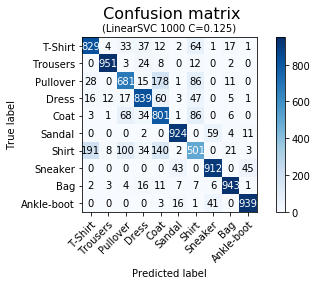

Test accuracy:  0.832 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.68      0.71      1000
           3       0.84      0.84      0.84      1000
           4       0.66      0.80      0.72      1000
           5       0.92      0.92      0.92      1000
           6       0.62      0.50      0.56      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



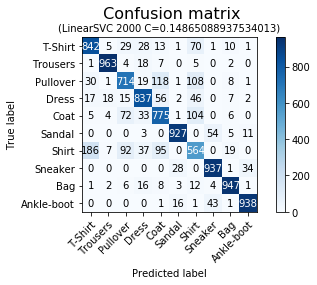

Test accuracy:  0.8444 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.71      0.74      1000
           3       0.84      0.84      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.62      0.56      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



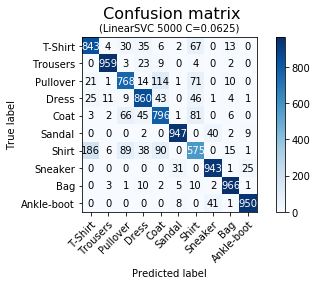

Test accuracy:  0.8607 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.77      0.78      1000
           3       0.84      0.86      0.85      1000
           4       0.75      0.80      0.77      1000
           5       0.95      0.95      0.95      1000
           6       0.67      0.57      0.62      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



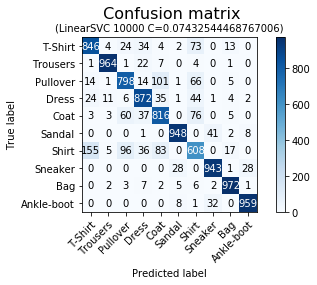

Test accuracy:  0.8726 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.96      0.97      1000
           2       0.81      0.80      0.80      1000
           3       0.85      0.87      0.86      1000
           4       0.78      0.82      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.61      0.65      1000
           7       0.93      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



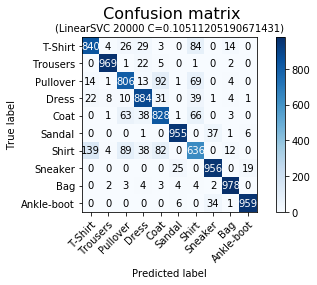

Test accuracy:  0.8811 

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.71      0.64      0.67      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


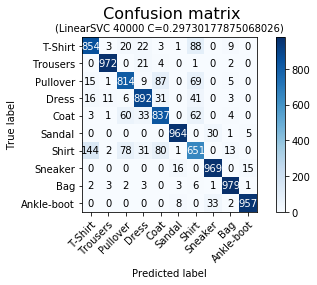

Test accuracy:  0.8889 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.84      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



NameError: name 'X_train_9_4_2_ls_hys' is not defined

In [6]:
############################################################################
##################  LinearSVC, loss=hinge ##################################
##################  Training mit opt. Parametern #############################
############################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',0.0625,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.125,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.14865088937534013,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.0625,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.07432544468767006,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.29730177875068026,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_ls_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.5,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


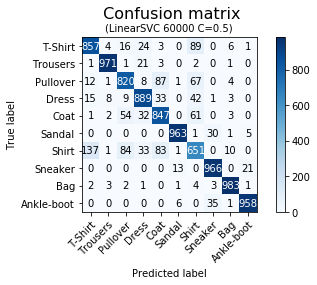

Test accuracy:  0.8905 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [7]:
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.5,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler", "HOG_942.pkl")


In [8]:
##############################################################################
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.808

 Besten Parameter:  {'svm__C': 0.015625}
Bester Estimator score:  0.8136
Precision-Score: 0.578176 (0.057656) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.618168 (0.065864) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.681844 (0.039029) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.722464 (0.054953) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.788123 (0.058027) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.823968 (0.045016) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.830040 (0.036275) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.807460 (0.046516) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.810139 (0.052189) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.808687 (0.053861) mit Parameter:


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.854

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8459
Precision-Score: 0.705259 (0.041293) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.721503 (0.029360) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.776345 (0.021090) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.811725 (0.017449) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.842701 (0.020190) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.855370 (0.026489) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.859193 (0.026860) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.844548 (0.027365) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.834535 (0.023980) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.825608 (0.023344) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8230


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8728

 Besten Parameter:  {'svm__C': 0.015625}
Bester Estimator score:  0.8706
Precision-Score: 0.726529 (0.006961) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.767305 (0.007998) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.807787 (0.008410) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.841367 (0.003912) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.861987 (0.005388) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.872142 (0.003498) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.871818 (0.004156) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.867397 (0.004929) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.859097 (0.004399) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.850317 (0.005171) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.888425

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8905
Precision-Score: 0.763660 (0.000842) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.804498 (0.000328) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.836392 (0.001483) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.860130 (0.003001) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.875764 (0.003705) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.883820 (0.003562) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.887700 (0.002694) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.886506 (0.003925) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.882280 (0.004751) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.876360 (0.005550) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8

In [9]:
##############################################################################
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  2. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_21DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/500/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/1000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/2000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/5000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/10000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/20000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/40000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/60000/seed_1_random_B_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.03 0.04
 0.04 0.05 0.06]

 Bester Score:  0.818

 Besten Parameter:  {'svm__C': 0.018581361171917516}
Bester Estimator score:  0.8168
Precision-Score: 0.788123 (0.058027) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.792794 (0.060230) mit Parameter: {'svm__C': 0.004645340292979379}
Precision-Score: 0.801175 (0.053323) mit Parameter: {'svm__C': 0.005524271728019903}
Precision-Score: 0.807282 (0.049384) mit Parameter: {'svm__C': 0.0065695032441696445}
Precision-Score: 0.813472 (0.052652) mit Parameter: {'svm__C': 0.0078125}
Precision-Score: 0.818687 (0.050449) mit Parameter: {'svm__C': 0.009290680585958758}
Precision-Score: 0.819639 (0.047704) mit Parameter: {'svm__C': 0.011048543456039806}
Precision-Score: 0.819639 (0.047704) mit Parameter: {'svm__C': 0.013139006488339289}
Precision-Score: 0.823968 (0.045016) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.83


 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.855

 Besten Parameter:  {'svm__C': 0.04419417382415922}
Bester Estimator score:  0.848
Precision-Score: 0.855370 (0.026489) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.854359 (0.025867) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.853771 (0.029118) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.854122 (0.029744) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.856032 (0.028270) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.857591 (0.027329) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.859250 (0.026495) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.857625 (0.025970) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.859193 (0.026860) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.857497 (0.028347) mit Parameter: {'svm__C': 0.074325


 C_range: [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.03 0.04
 0.04 0.05 0.06]

 Bester Score:  0.8752

 Besten Parameter:  {'svm__C': 0.03716272234383503}
Bester Estimator score:  0.8712
Precision-Score: 0.861987 (0.005388) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.864902 (0.005255) mit Parameter: {'svm__C': 0.004645340292979379}
Precision-Score: 0.866798 (0.004087) mit Parameter: {'svm__C': 0.005524271728019903}
Precision-Score: 0.868284 (0.002426) mit Parameter: {'svm__C': 0.0065695032441696445}
Precision-Score: 0.869885 (0.002918) mit Parameter: {'svm__C': 0.0078125}
Precision-Score: 0.870090 (0.003164) mit Parameter: {'svm__C': 0.009290680585958758}
Precision-Score: 0.871147 (0.003232) mit Parameter: {'svm__C': 0.011048543456039806}
Precision-Score: 0.870951 (0.004134) mit Parameter: {'svm__C': 0.013139006488339289}
Precision-Score: 0.872142 (0.003498) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.873318 (0.004061) mit Parameter: {'svm__

*********************************************************************
GridSearch LinearSVC 40000 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.888425

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8905
Precision-Score: 0.883820 (0.003562) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.885124 (0.003259) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.885732 (0.003105) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.886423 (0.003211) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.886939 (0.003030) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.887152 (0.002498) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.887361 (0.002653) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.887304 (0.002473) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.887700 (0.002694) mit 

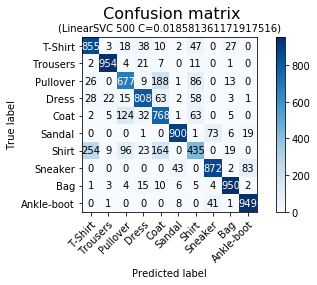

Test accuracy:  0.8168 

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1000
           1       0.96      0.95      0.96      1000
           2       0.72      0.68      0.70      1000
           3       0.85      0.81      0.83      1000
           4       0.63      0.77      0.70      1000
           5       0.93      0.90      0.92      1000
           6       0.62      0.43      0.51      1000
           7       0.88      0.87      0.88      1000
           8       0.93      0.95      0.94      1000
           9       0.90      0.95      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



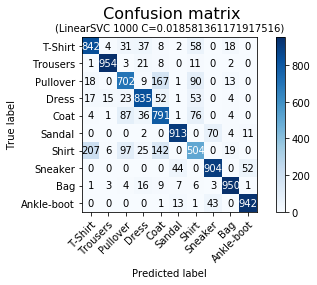

Test accuracy:  0.8337 

              precision    recall  f1-score   support

           0       0.77      0.84      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.74      0.70      0.72      1000
           3       0.85      0.83      0.84      1000
           4       0.67      0.79      0.73      1000
           5       0.93      0.91      0.92      1000
           6       0.63      0.50      0.56      1000
           7       0.89      0.90      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



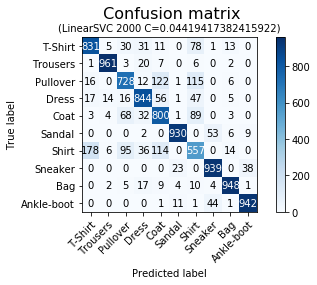

Test accuracy:  0.848 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.77      0.73      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.71      0.80      0.75      1000
           5       0.96      0.93      0.94      1000
           6       0.62      0.56      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



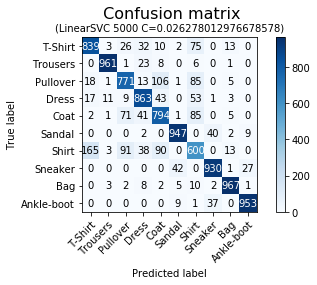

Test accuracy:  0.8625 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.77      0.78      1000
           3       0.85      0.86      0.85      1000
           4       0.75      0.79      0.77      1000
           5       0.94      0.95      0.94      1000
           6       0.66      0.60      0.63      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



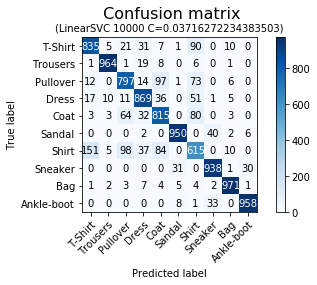

Test accuracy:  0.8712 

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.80      0.80      1000
           3       0.86      0.87      0.86      1000
           4       0.78      0.81      0.79      1000
           5       0.95      0.95      0.95      1000
           6       0.67      0.61      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



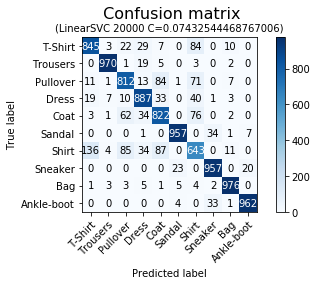

Test accuracy:  0.8831 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



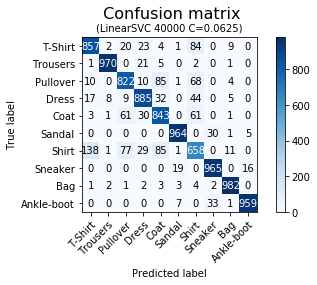

Test accuracy:  0.8905 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.84      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.66      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



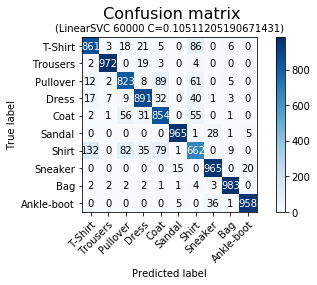

Test accuracy:  0.8934 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [10]:
############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit opt. Parametern  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',0.018581361171917516,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.018581361171917516,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.04419417382415922,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.026278012976678578,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.03716272234383503,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.07432544468767006,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.0625,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen B/", "seed_1_random_B_without_scaler_l2_sq_hinge", "HOG_942.pkl")


In [38]:
##############################################################################
##############################################################################
################  GridSearchCV RBF-Kernel           ##########################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/500/seed_1_random_B_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/500/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/1000/seed_1_random_B_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/1000/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/2000/seed_1_random_B_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/2000/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

GridSearch LinearSVC 500 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.814

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.734642 (0.051088) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.752443 (0.050732) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.766018 (0.049321) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.745157 (0.062610) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.693700 (0.141110) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.175318 (0.055414) mit Parameter: {'svm


 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.858

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.784355 (0.040158) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.786044 (0.036129) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.802598 (0.044383) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.766675 (0.040325) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.776856 (0.059580) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.307176 (0.076109) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma


 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.866

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.0009765625}
Precision-Score: 0.775636 (0.028240) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.776995 (0.030694) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.783961 (0.025709) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.753319 (0.028369) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.780795 (0.065937) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.284795 (0.127760) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0

In [ ]:
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/500/seed_1_random_B_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/500/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(16.0),
                                         get_finer_range(6.103515625e-05), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/1000/seed_1_random_B_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/1000/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(),
                                         get_finer_range(), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/2000/seed_1_random_B_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/2000/seed_1_random_B_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

In [ ]:
train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',2.0, 0.0006905339660024879,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000', 1.681792830507429,0.0008211879055212056,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',2.8284271247461903,0.0006905339660024879,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen B/", "seed_1_random_B_with_scaler", "HOG_942_ovo.pkl")


In [35]:
#########################################################################
##########   3. Aufteilung der Trainingsdaten 
##########   gemäss   make_training_subset_C
#########################################################################
'''
Trainingsdatensätze unterschiedlicher Größe erstellen
C
'''
X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_C(X_train_9_4_2_l2_hys, y_train)


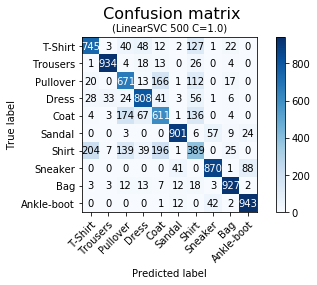

Test accuracy:  0.7799 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.95      0.93      0.94      1000
           2       0.63      0.67      0.65      1000
           3       0.80      0.81      0.81      1000
           4       0.58      0.61      0.60      1000
           5       0.93      0.90      0.91      1000
           6       0.45      0.39      0.42      1000
           7       0.89      0.87      0.88      1000
           8       0.91      0.93      0.92      1000
           9       0.89      0.94      0.92      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



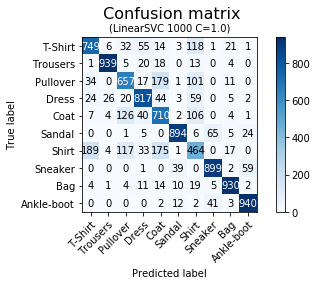

Test accuracy:  0.7999 

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.96      0.94      0.95      1000
           2       0.68      0.66      0.67      1000
           3       0.82      0.82      0.82      1000
           4       0.61      0.71      0.66      1000
           5       0.93      0.89      0.91      1000
           6       0.52      0.46      0.49      1000
           7       0.89      0.90      0.89      1000
           8       0.93      0.93      0.93      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



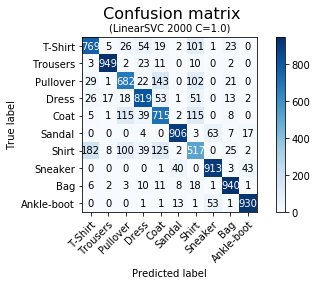

Test accuracy:  0.814 

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.68      0.70      1000
           3       0.81      0.82      0.81      1000
           4       0.66      0.71      0.69      1000
           5       0.93      0.91      0.92      1000
           6       0.56      0.52      0.54      1000
           7       0.89      0.91      0.90      1000
           8       0.90      0.94      0.92      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


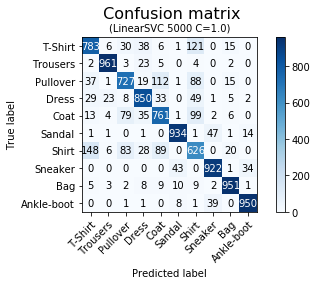

Test accuracy:  0.8465 

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.78      0.73      0.75      1000
           3       0.85      0.85      0.85      1000
           4       0.75      0.76      0.76      1000
           5       0.94      0.93      0.93      1000
           6       0.63      0.63      0.63      1000
           7       0.91      0.92      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


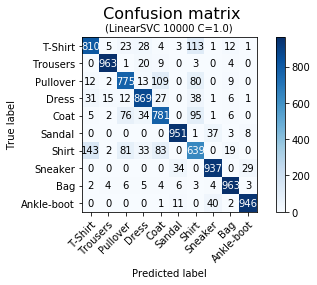

Test accuracy:  0.8634 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.87      0.87      0.87      1000
           4       0.77      0.78      0.77      1000
           5       0.95      0.95      0.95      1000
           6       0.66      0.64      0.65      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


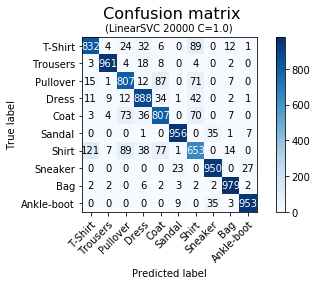

Test accuracy:  0.8786 

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.81      0.80      1000
           3       0.86      0.89      0.87      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.65      0.68      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


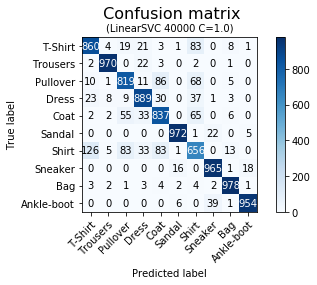

Test accuracy:  0.89 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.97      1000
           2       0.83      0.82      0.82      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.66      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



NameError: name 'X_train_9_4_2_ls_hys' is not defined

In [14]:
############################################################################
##################  LinearSVC, loss=hinge ##################################
##################  Training mit Defaultwerten #############################
############################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_ls_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


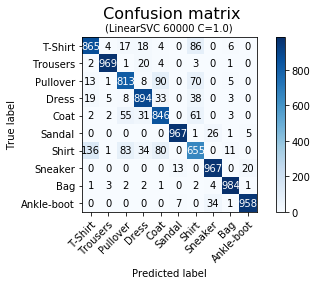

Test accuracy:  0.8918 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.66      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [20]:
# Fortsetzung
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")


In [17]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  1. Durchlauf                      ##########################
##############################################################################
print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')


print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.804

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.7997
Precision-Score: 0.599083 (0.080920) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.599083 (0.080920) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.474839 (0.073560) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.574375 (0.107215) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.683393 (0.081874) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.764893 (0.059539) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.809095 (0.058934) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.804254 (0.036762) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.805825 (0.030659) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.805825 (0.030659) mit Parameter: {


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8315

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8467
Precision-Score: 0.695577 (0.030283) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.567851 (0.045243) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.713673 (0.051313) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.761569 (0.013463) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.800969 (0.020191) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.837570 (0.022536) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.835729 (0.016341) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.830867 (0.025646) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.820052 (0.029238) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.808639 (0.026882) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.808


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8734

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8691
Precision-Score: 0.591624 (0.053687) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.724755 (0.012383) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.754115 (0.008588) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.804842 (0.008964) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.838921 (0.008087) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.861714 (0.005305) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.872082 (0.006837) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.870728 (0.007683) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.863354 (0.003508) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.851815 (0.003147) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.836

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8871

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8908
Precision-Score: 0.725297 (0.003154) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.752008 (0.003270) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.796393 (0.003140) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.834230 (0.003929) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.859148 (0.001625) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.875773 (0.001141) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.883345 (0.000295) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885842 (0.001411) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.884428 (0.002241) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.880056 (0.002515) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.87377

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8905833333333333

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8918
Precision-Score: 0.731737 (0.003078) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.757229 (0.002095) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.811653 (0.002841) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.840640 (0.002553) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.865505 (0.002219) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.879955 (0.001051) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.887330 (0.001674) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.886642 (0.000551) mit Parameter: {'svm__C': 4.0}
Precision-Sco

In [18]:
##############################################################################
################  GridSearchCV   LinearSVC   loss=hinge ######################
################  2. Durchlauf                      ##########################
##############################################################################
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(1.0),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

GridSearch LinearSVC 500 1. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.806

 Besten Parameter:  {'svm__C': 0.07432544468767006}
Bester Estimator score:  0.8012
Precision-Score: 0.764893 (0.059539) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.775881 (0.053829) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.783849 (0.056697) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.779155 (0.047957) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.788179 (0.055654) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.785230 (0.061684) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.789563 (0.060099) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.809905 (0.059428) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.809095 (0.058934) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.811839 (0.059

*********************************************************************
GridSearch LinearSVC 2000 1. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8365

 Besten Parameter:  {'svm__C': 0.10511205190671431}
Bester Estimator score:  0.8448
Precision-Score: 0.837570 (0.022536) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.838704 (0.021745) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.840199 (0.019417) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.838675 (0.021708) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.836351 (0.021766) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.836414 (0.020731) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.838602 (0.021487) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.837809 (0.019367) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.835729 (0.01

*********************************************************************
GridSearch LinearSVC 10000 1. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8737

 Besten Parameter:  {'svm__C': 0.14865088937534013}
Bester Estimator score:  0.8714
Precision-Score: 0.861714 (0.005305) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.863457 (0.004718) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.864862 (0.003817) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.866576 (0.004254) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.867745 (0.004190) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.868399 (0.004564) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.868105 (0.004253) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.869866 (0.006653) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.872082 (0.0

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.887575

 Besten Parameter:  {'svm__C': 0.3535533905932738}
Bester Estimator score:  0.8901
Precision-Score: 0.883345 (0.000295) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.884625 (0.000313) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.884891 (0.000419) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.885126 (0.000158) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.885176 (0.000902) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.885346 (0.000725) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.885815 (0.001574) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.885555 (0.001283) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.885842 (0.001411) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.886044 (0.001591) mit Parameter: {'svm__C': 0.2973017787506

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



GridSearch LinearSVC 60000 1. Durchlauf

 C_range: [0.25 0.3  0.35 0.42 0.5  0.59 0.71 0.84 1.   1.19 1.41 1.68 2.   2.38
 2.83 3.36 4.  ]

 Bester Score:  0.8913

 Besten Parameter:  {'svm__C': 0.5}
Bester Estimator score:  0.8905
Precision-Score: 0.889502 (0.001306) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.889673 (0.001192) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.890152 (0.000915) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.890127 (0.000918) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.890436 (0.000896) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.890249 (0.000521) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.890158 (0.000849) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.889976 (0.000922) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.889723 (0.000663) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.889505 (0.001021) mit Parameter: {'svm__C':

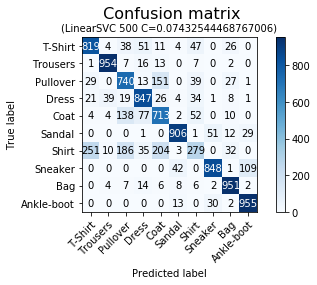

Test accuracy:  0.8012 

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1000
           1       0.94      0.95      0.95      1000
           2       0.65      0.74      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.63      0.71      0.67      1000
           5       0.92      0.91      0.91      1000
           6       0.60      0.28      0.38      1000
           7       0.91      0.85      0.88      1000
           8       0.89      0.95      0.92      1000
           9       0.87      0.95      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000



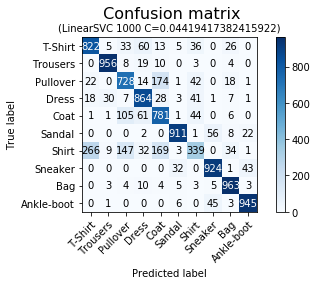

Test accuracy:  0.8233 

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1000
           1       0.95      0.96      0.95      1000
           2       0.71      0.73      0.72      1000
           3       0.81      0.86      0.84      1000
           4       0.66      0.78      0.72      1000
           5       0.94      0.91      0.93      1000
           6       0.67      0.34      0.45      1000
           7       0.90      0.92      0.91      1000
           8       0.90      0.96      0.93      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



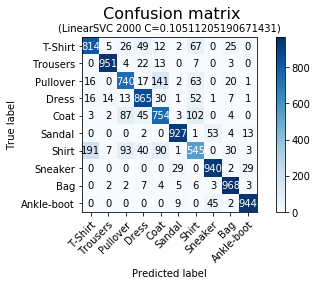

Test accuracy:  0.8448 

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.77      0.74      0.75      1000
           3       0.83      0.86      0.85      1000
           4       0.72      0.75      0.74      1000
           5       0.95      0.93      0.94      1000
           6       0.65      0.55      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.91      0.97      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



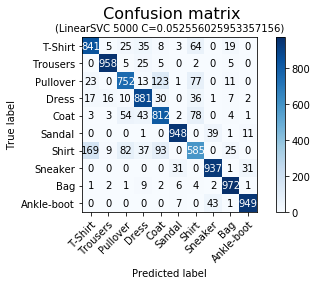

Test accuracy:  0.8635 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.96      0.96      0.96      1000
           2       0.81      0.75      0.78      1000
           3       0.84      0.88      0.86      1000
           4       0.76      0.81      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.58      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.93      0.97      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



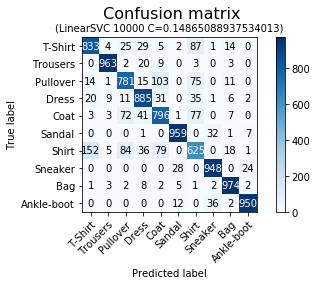

Test accuracy:  0.8714 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.80      0.79      1000
           5       0.95      0.96      0.96      1000
           6       0.69      0.62      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



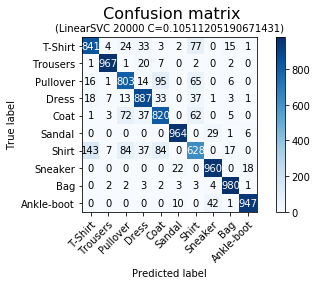

Test accuracy:  0.8797 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.80      0.80      0.80      1000
           3       0.86      0.89      0.87      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.63      0.67      1000
           7       0.93      0.96      0.94      1000
           8       0.95      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


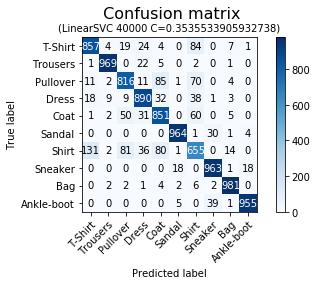

Test accuracy:  0.8901 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.97      1000
           2       0.84      0.82      0.83      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.85      0.83      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.66      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



NameError: name 'X_train_9_4_2_ls_hys' is not defined

In [19]:
############################################################################
##################  LinearSVC, loss=hinge ##################################
##################  Training mit opt. Parametern############################
############################################################################

train_LinearSVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',0.07432544468767006,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.04419417382415922,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.052556025953357156,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.14865088937534013,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.3535533905932738,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2_ls_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.5,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


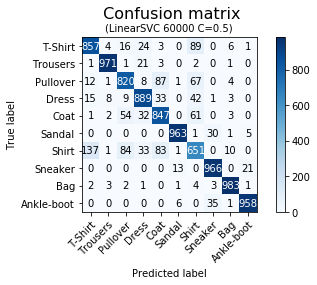

Test accuracy:  0.8905 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [36]:
train_LinearSVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.5,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler", "HOG_942.pkl")


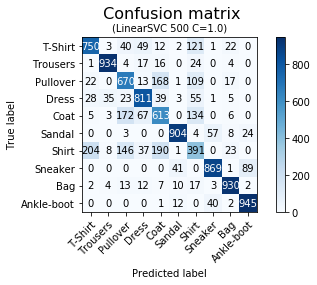

Test accuracy:  0.7817 

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.95      0.93      0.94      1000
           2       0.63      0.67      0.65      1000
           3       0.81      0.81      0.81      1000
           4       0.59      0.61      0.60      1000
           5       0.93      0.90      0.92      1000
           6       0.46      0.39      0.42      1000
           7       0.89      0.87      0.88      1000
           8       0.91      0.93      0.92      1000
           9       0.89      0.94      0.92      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



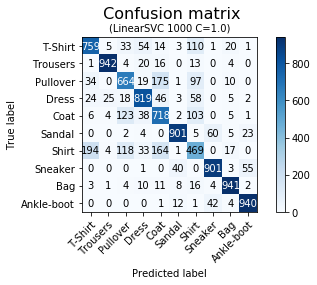

Test accuracy:  0.8054 

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.96      0.94      0.95      1000
           2       0.69      0.66      0.68      1000
           3       0.82      0.82      0.82      1000
           4       0.63      0.72      0.67      1000
           5       0.93      0.90      0.91      1000
           6       0.54      0.47      0.50      1000
           7       0.89      0.90      0.90      1000
           8       0.93      0.94      0.93      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



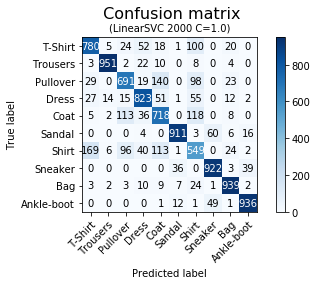

Test accuracy:  0.822 

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.73      0.69      0.71      1000
           3       0.82      0.82      0.82      1000
           4       0.68      0.72      0.70      1000
           5       0.94      0.91      0.93      1000
           6       0.57      0.55      0.56      1000
           7       0.89      0.92      0.91      1000
           8       0.90      0.94      0.92      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



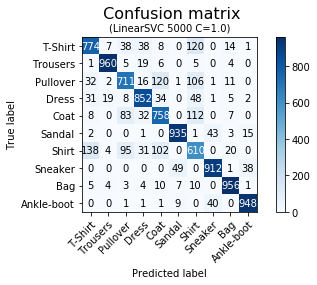

Test accuracy:  0.8416 

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.75      0.71      0.73      1000
           3       0.86      0.85      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.93      0.94      0.93      1000
           6       0.60      0.61      0.61      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.96      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



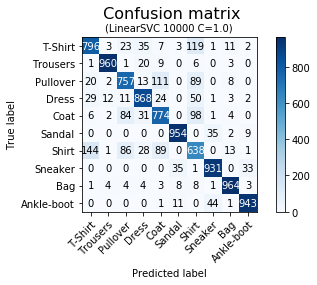

Test accuracy:  0.8585 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.87      0.87      0.87      1000
           4       0.76      0.77      0.77      1000
           5       0.94      0.95      0.95      1000
           6       0.63      0.64      0.64      1000
           7       0.92      0.93      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


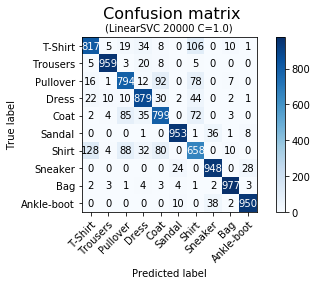

Test accuracy:  0.8734 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.86      0.88      0.87      1000
           4       0.78      0.80      0.79      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.66      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



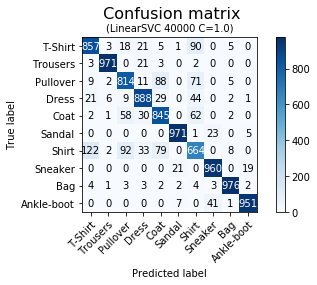

Test accuracy:  0.8897 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.66      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


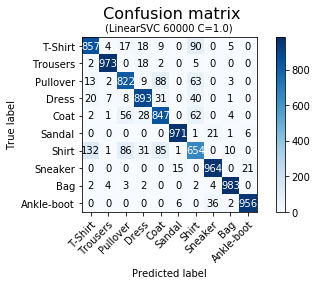

Test accuracy:  0.892 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [13]:
############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit Defaultwerten  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")


In [ ]:
############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit Defaultwerten  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")


In [21]:
##############################################################################
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.804

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8016
Precision-Score: 0.596141 (0.088549) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.606659 (0.095330) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.644309 (0.092085) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.728676 (0.044710) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.782561 (0.041042) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.810175 (0.057638) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.816270 (0.036690) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.810659 (0.024901) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.810206 (0.027799) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.807159 (0.029018) mit Parameter: {


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8375

 Besten Parameter:  {'svm__C': 0.015625}
Bester Estimator score:  0.8462
Precision-Score: 0.735099 (0.031408) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.742589 (0.027429) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.776656 (0.019607) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.805864 (0.019938) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.829114 (0.020108) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.841679 (0.019575) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.837879 (0.026839) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.827555 (0.032900) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.825755 (0.032339) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.812249 (0.028228) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.874

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8703
Precision-Score: 0.732291 (0.014596) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.772782 (0.011053) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.808343 (0.011274) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.838151 (0.009100) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.859365 (0.005900) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.872646 (0.004551) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.873324 (0.006350) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.869122 (0.004681) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.859933 (0.004326) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.848606 (0.005356) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.8366

*********************************************************************
GridSearch LinearSVC 40000 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.88775

 Besten Parameter:  {'svm__C': 0.0625}
Bester Estimator score:  0.8915
Precision-Score: 0.765721 (0.002546) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.805500 (0.003492) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.837270 (0.002532) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.860581 (0.001423) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.876121 (0.001831) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.884352 (0.000808) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.886818 (0.002276) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.886778 (0.001967) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.883930 (0.001692) mit Parame

In [23]:
##############################################################################
##############################################################################
################  GridSearchCV LinearSVC loss=squared_hinge   ################
################  2. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/500/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/1000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.015625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/2000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/5000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/10000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/20000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.0625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/40000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2_l2_hys, y_train, X_test_9_4_2_l2_hys, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/60000/seed_1_random_C_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.806

 Besten Parameter:  {'svm__C': 0.052556025953357156}
Bester Estimator score:  0.8025
Precision-Score: 0.810175 (0.057638) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.813365 (0.058122) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.810365 (0.052359) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.810365 (0.052359) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.813306 (0.051479) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.810385 (0.056123) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.810556 (0.056454) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.821722 (0.048201) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.816270 (0.036690) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.816710 (0.02


 C_range: [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.03 0.04
 0.04 0.05 0.06]

 Bester Score:  0.84

 Besten Parameter:  {'svm__C': 0.013139006488339289}
Bester Estimator score:  0.8456
Precision-Score: 0.829114 (0.020108) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.831683 (0.019058) mit Parameter: {'svm__C': 0.004645340292979379}
Precision-Score: 0.831983 (0.020081) mit Parameter: {'svm__C': 0.005524271728019903}
Precision-Score: 0.834053 (0.023399) mit Parameter: {'svm__C': 0.0065695032441696445}
Precision-Score: 0.836248 (0.021814) mit Parameter: {'svm__C': 0.0078125}
Precision-Score: 0.838746 (0.023312) mit Parameter: {'svm__C': 0.009290680585958758}
Precision-Score: 0.840376 (0.019596) mit Parameter: {'svm__C': 0.011048543456039806}
Precision-Score: 0.843275 (0.019489) mit Parameter: {'svm__C': 0.013139006488339289}
Precision-Score: 0.841679 (0.019575) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.839897 (0.021282) mit Parameter: {'svm__C

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.8751

 Besten Parameter:  {'svm__C': 0.018581361171917516}
Bester Estimator score:  0.8697
Precision-Score: 0.872646 (0.004551) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.874160 (0.004532) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.874161 (0.004659) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.872143 (0.005088) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.873354 (0.005547) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.873135 (0.005178) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.873729 (0.005435) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.873786 (0.006642) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.873324 (0.


 C_range: [0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.06 0.07 0.09 0.11 0.12 0.15
 0.18 0.21 0.25]

 Bester Score:  0.88825

 Besten Parameter:  {'svm__C': 0.1767766952966369}
Bester Estimator score:  0.8931
Precision-Score: 0.884352 (0.000808) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.885234 (0.000989) mit Parameter: {'svm__C': 0.018581361171917516}
Precision-Score: 0.885846 (0.000825) mit Parameter: {'svm__C': 0.02209708691207961}
Precision-Score: 0.886174 (0.001159) mit Parameter: {'svm__C': 0.026278012976678578}
Precision-Score: 0.886397 (0.001685) mit Parameter: {'svm__C': 0.03125}
Precision-Score: 0.886549 (0.001856) mit Parameter: {'svm__C': 0.03716272234383503}
Precision-Score: 0.887074 (0.002082) mit Parameter: {'svm__C': 0.04419417382415922}
Precision-Score: 0.887006 (0.001929) mit Parameter: {'svm__C': 0.052556025953357156}
Precision-Score: 0.886818 (0.002276) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.887169 (0.002395) mit Parameter: {'svm__C': 0.0743

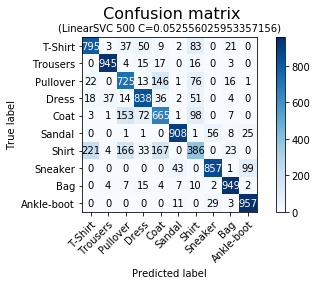

Test accuracy:  0.8025 

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1000
           1       0.95      0.94      0.95      1000
           2       0.65      0.72      0.69      1000
           3       0.81      0.84      0.82      1000
           4       0.64      0.67      0.65      1000
           5       0.93      0.91      0.92      1000
           6       0.54      0.39      0.45      1000
           7       0.91      0.86      0.88      1000
           8       0.92      0.95      0.93      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



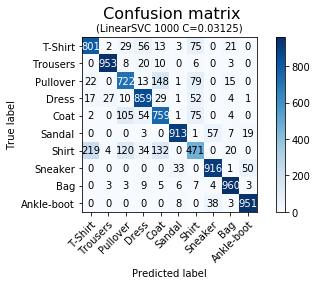

Test accuracy:  0.8305 

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1000
           1       0.96      0.95      0.96      1000
           2       0.72      0.72      0.72      1000
           3       0.82      0.86      0.84      1000
           4       0.69      0.76      0.72      1000
           5       0.95      0.91      0.93      1000
           6       0.61      0.47      0.53      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.96      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



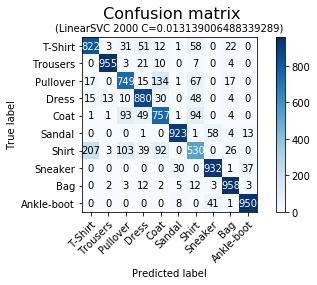

Test accuracy:  0.8456 

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.76      0.75      0.75      1000
           3       0.82      0.88      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.95      0.92      0.94      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.93      0.92      1000
           8       0.92      0.96      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



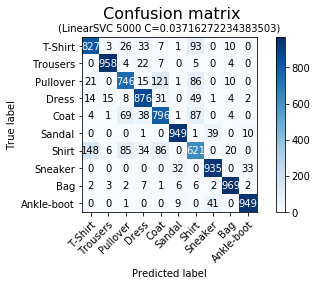

Test accuracy:  0.8626 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.97      0.96      0.96      1000
           2       0.79      0.75      0.77      1000
           3       0.85      0.88      0.86      1000
           4       0.76      0.80      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.66      0.62      0.64      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



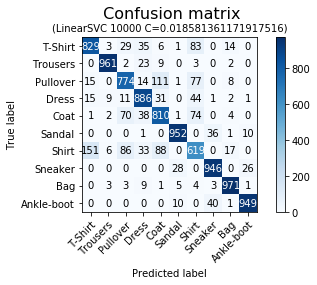

Test accuracy:  0.8697 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.77      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.77      0.81      0.79      1000
           5       0.95      0.95      0.95      1000
           6       0.68      0.62      0.65      1000
           7       0.92      0.95      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



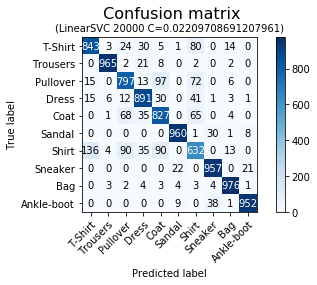

Test accuracy:  0.88 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.80      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.78      0.83      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.63      0.67      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



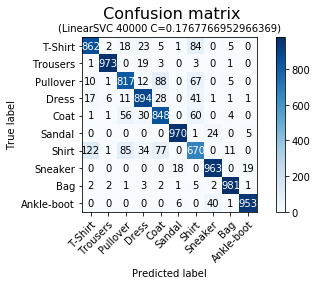

Test accuracy:  0.8931 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.67      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



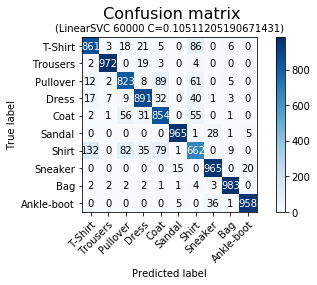

Test accuracy:  0.8934 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.85      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
############################################################################
##################  LinearSVC, loss=squared_hinge  #########################
##################  Training mit opt. Parametern  ############################
############################################################################

train_LinearSVC_sq(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',0.052556025953357156,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',0.03125,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',0.013139006488339289,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',0.03716272234383503,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',0.018581361171917516,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',0.02209708691207961,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',0.1767766952966369,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',0.10511205190671431,
               "SVM_Modelle_FM/Hog_opt_l2_hys/LinearSVC/Neue Mengen C/", "seed_1_random_C_without_scaler_l2_sq_hinge", "HOG_942.pkl")


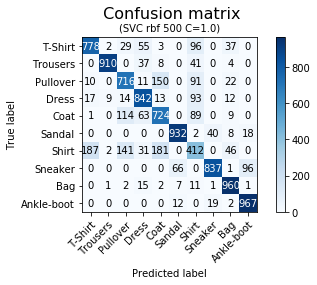

Test accuracy:  0.8078 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.98      0.91      0.95      1000
           2       0.70      0.72      0.71      1000
           3       0.80      0.84      0.82      1000
           4       0.67      0.72      0.70      1000
           5       0.92      0.93      0.92      1000
           6       0.49      0.41      0.45      1000
           7       0.93      0.84      0.88      1000
           8       0.87      0.96      0.91      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



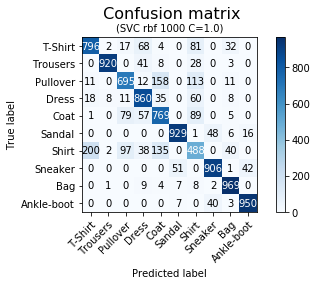

Test accuracy:  0.8282 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.99      0.92      0.95      1000
           2       0.77      0.69      0.73      1000
           3       0.79      0.86      0.82      1000
           4       0.69      0.77      0.73      1000
           5       0.93      0.93      0.93      1000
           6       0.56      0.49      0.52      1000
           7       0.91      0.91      0.91      1000
           8       0.90      0.97      0.93      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



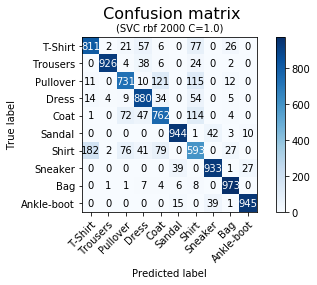

Test accuracy:  0.8498 

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.99      0.93      0.96      1000
           2       0.80      0.73      0.76      1000
           3       0.81      0.88      0.85      1000
           4       0.75      0.76      0.76      1000
           5       0.94      0.94      0.94      1000
           6       0.60      0.59      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.92      0.97      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



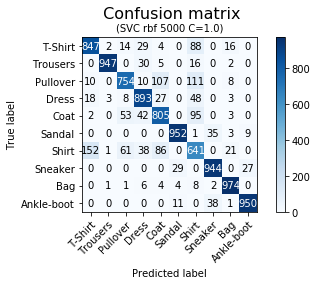

Test accuracy:  0.8707 

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.85      0.75      0.80      1000
           3       0.85      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.96      0.95      0.95      1000
           6       0.64      0.64      0.64      1000
           7       0.93      0.94      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



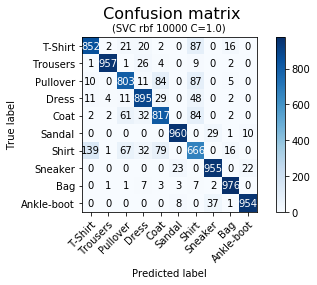

Test accuracy:  0.8835 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.96      0.97      1000
           2       0.83      0.80      0.82      1000
           3       0.87      0.90      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.67      0.67      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



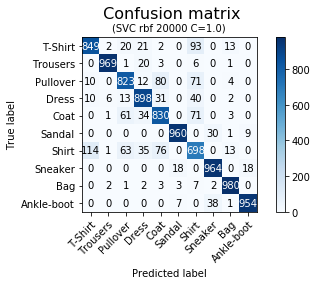

Test accuracy:  0.8925 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.83      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.70      0.70      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



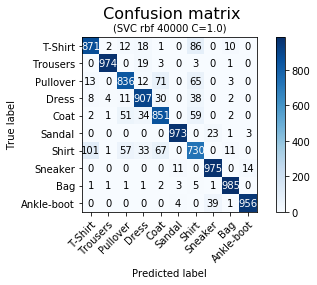

Test accuracy:  0.9058 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.85      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.73      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



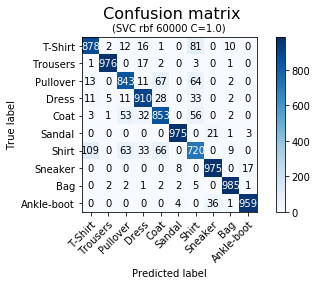

Test accuracy:  0.9074 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [22]:
############################################################################
##################  SVC RBF-Kernel, mit StandardScaler #####################
##################    decision_function_shape = 'ovo'  #####################
##################  Defaultwerte
############################################################################

train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2_l2_hys, y_tr_5000, y_test, 1, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2_l2_hys, y_tr_10000, y_test, 1, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2_l2_hys, y_tr_20000, y_test, 1, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2_l2_hys, y_tr_40000, y_test, 1, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_train_9_4_2_l2_hys, X_test_9_4_2_l2_hys, y_train, y_test, 1, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")

In [23]:
##############################################################################
##############################################################################
################  GridSearchCV RGB-Kernel           ##########################
################  1. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

GridSearch LinearSVC 500 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.816

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.736053 (0.087406) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.740433 (0.071605) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.777007 (0.050317) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.763305 (0.055486) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.647275 (0.103698) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.257587 (0.097023) mit Parameter: {'svm

FileNotFoundError: [Errno 2] No such file or directory: 'SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/GridSearch_1DL.pkl'

In [37]:
# nochmal speichern, da zu versehentlich kein Ordner vorhanden war
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

In [39]:
print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/1000/seed_1_random_C_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/1000/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/2000/seed_1_random_C_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/2000/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

*********************************************************************
GridSearch LinearSVC 1000 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.833

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.0009765625}
Precision-Score: 0.758764 (0.044895) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.762220 (0.042071) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.775753 (0.039707) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.755724 (0.046307) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.728684 (0.097470) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 

*********************************************************************
GridSearch LinearSVC 2000 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.849

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.0009765625}
Precision-Score: 0.767034 (0.017591) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.768461 (0.018325) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.771430 (0.019386) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.765790 (0.026666) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.772298 (0.092173) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 

In [29]:
##############################################################################
################  GridSearchCV RGB-Kernel           ##########################
################  2. Durchlauf                      ##########################
##############################################################################

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/500/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(0.0009765625), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/1000/seed_1_random_C_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/1000/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

GridSearch LinearSVC 500 2. Durchlauf

 C_range:  [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 gamma_range: [6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04 2.90e-04 3.45e-04 4.11e-04 4.88e-04 5.81e-04 6.91e-04 8.21e-04
 9.77e-04]

 Beste Score:  0.824

 Besten Parameter:  {'svm__C': 2.0, 'svm__gamma': 0.0006905339660024879}
Precision-Score: 0.774814 (0.048187) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.784874 (0.049056) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 7.25834420778028e-05}
Precision-Score: 0.770501 (0.048890) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 8.631674575031098e-05}
Precision-Score: 0.771858 (0.037681) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001026484881901507}
Precision-Score: 0.795414 (0.040620) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001220703125}
Precision-Score: 0.800758 (0.043516) mit Parameter: {'svm__C': 1.

Accuracy-Score: 0.804000 (0.047159) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 0.0009765625}
Roc-Score: 0.860000 (0.021199) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 6.103515625e-05}
Roc-Score: 0.868889 (0.022662) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 7.25834420778028e-05}
Roc-Score: 0.868889 (0.022662) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 8.631674575031098e-05}
Roc-Score: 0.872222 (0.021228) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001026484881901507}
Roc-Score: 0.881111 (0.015753) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001220703125}
Roc-Score: 0.883333 (0.016667) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0001451668841556056}
Roc-Score: 0.886667 (0.017778) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00017263349150062197}
Roc-Score: 0.891111 (0.022662) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0002052969763803014}
Roc-Score: 0.887778 (0.023544) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.000244140625}
Roc-Score: 0.893333 (0.023413) m


 C_range:  [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 gamma_range: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 Beste Score:  0.837

 Besten Parameter:  {'svm__C': 1.681792830507429, 'svm__gamma': 0.0008211879055212056}
Precision-Score: 0.837256 (0.035840) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.835957 (0.032823) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0002903337683112112}
Precision-Score: 0.836156 (0.031436) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00034526698300124393}
Precision-Score: 0.837727 (0.028103) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0004105939527606028}
Precision-Score: 0.836391 (0.023264) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00048828125}
Precision-Score: 0.838076 (0.020913) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0005806675366224224}
Precision-Score: 0.837668 (0.020566) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00069

Roc-Score: 0.906667 (0.012373) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0011613350732448448}
Roc-Score: 0.902222 (0.012222) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0013810679320049757}
Roc-Score: 0.894444 (0.013147) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0016423758110424111}
Roc-Score: 0.876667 (0.020306) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.001953125}
Roc-Score: 0.859444 (0.017925) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0023226701464896895}
Roc-Score: 0.837778 (0.013333) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0027621358640099515}
Roc-Score: 0.814444 (0.013654) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.0032847516220848223}
Roc-Score: 0.789444 (0.017647) mit Parameter: {'svm__C': 1.4142135623730951, 'svm__gamma': 0.00390625}
Roc-Score: 0.905556 (0.014907) mit Parameter: {'svm__C': 1.681792830507429, 'svm__gamma': 0.000244140625}
Roc

In [30]:
print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2_l2_hys, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4.0),
                                         get_finer_range(0.0009765625), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/2000/seed_1_random_C_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/2000/seed_1_random_C_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range:  [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 gamma_range: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 Beste Score:  0.8525

 Besten Parameter:  {'svm__C': 2.8284271247461903, 'svm__gamma': 0.0006905339660024879}
Precision-Score: 0.840192 (0.017274) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.000244140625}
Precision-Score: 0.842681 (0.017332) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0002903337683112112}
Precision-Score: 0.843691 (0.016255) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00034526698300124393}
Precision-Score: 0.845384 (0.015272) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.0004105939527606028}
Precision-Score: 0.844836 (0.014593) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00048828125}
Precision-Score: 0.845693 (0.014379) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0

Roc-Score: 0.882778 (0.015154) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0023226701464896895}
Roc-Score: 0.857222 (0.017665) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0027621358640099515}
Roc-Score: 0.832500 (0.013780) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0032847516220848223}
Roc-Score: 0.802778 (0.019285) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.00390625}
Roc-Score: 0.912778 (0.011534) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.000244140625}
Roc-Score: 0.913056 (0.012301) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0002903337683112112}
Roc-Score: 0.915556 (0.010031) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.00034526698300124393}
Roc-Score: 0.916389 (0.008467) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0004105939527606028}
Roc-Score: 0.917500 (0.008611) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.00048828125}
Roc-Score: 0.916944 (0.010427) mit Parameter: {'svm__C': 2.37841

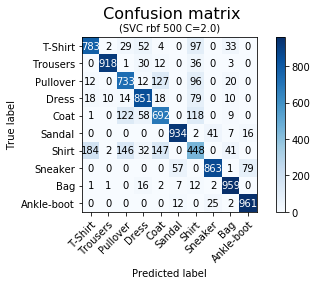

Test accuracy:  0.8142 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.98      0.92      0.95      1000
           2       0.70      0.73      0.72      1000
           3       0.81      0.85      0.83      1000
           4       0.69      0.69      0.69      1000
           5       0.92      0.93      0.93      1000
           6       0.50      0.45      0.47      1000
           7       0.93      0.86      0.89      1000
           8       0.88      0.96      0.92      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



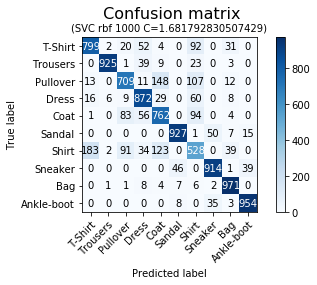

Test accuracy:  0.8361 

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.99      0.93      0.96      1000
           2       0.78      0.71      0.74      1000
           3       0.81      0.87      0.84      1000
           4       0.71      0.76      0.73      1000
           5       0.94      0.93      0.93      1000
           6       0.58      0.53      0.55      1000
           7       0.91      0.91      0.91      1000
           8       0.90      0.97      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



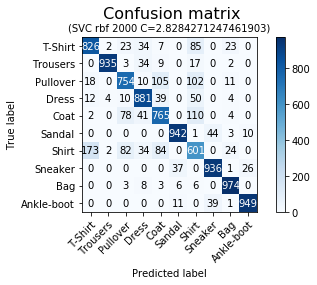

Test accuracy:  0.8563 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.94      0.96      1000
           2       0.79      0.75      0.77      1000
           3       0.85      0.88      0.86      1000
           4       0.76      0.77      0.76      1000
           5       0.95      0.94      0.94      1000
           6       0.62      0.60      0.61      1000
           7       0.92      0.94      0.93      1000
           8       0.93      0.97      0.95      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [31]:
train_RBF_SVC(X_tr_500, X_test_9_4_2_l2_hys, y_tr_500, y_test, 1, '500',2.0, 0.0006905339660024879,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2_l2_hys, y_tr_1000, y_test, 1, '1000', 1.681792830507429,0.0008211879055212056,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2_l2_hys, y_tr_2000, y_test, 1, '2000',2.8284271247461903,0.0006905339660024879,'ovo',
               "SVM_Modelle_FM/Hog_opt_l2_hys/rbf/Neue Mengen C/", "seed_1_random_C_with_scaler", "HOG_942_ovo.pkl")
